##  Churn Prediction: Analyzing the Telecom Churn Dataset
Customer churn, also known as customer turnover, refers to the loss of clients. This metric is critical across various industries, including telecom, internet services, pay TV, insurance, and alarm systems. Retaining customers is generally more cost-effective than acquiring new ones, making churn analysis a vital business strategy. Churn is categorized into two types: voluntary and involuntary. Voluntary churn arises from customer choices, while involuntary churn is caused by circumstances beyond customer control, such as relocation or death.

Predictive analytics leverages churn prediction models to estimate the likelihood of customer defection. By focusing on voluntary churn, companies can address manageable aspects of the customer experience, enhancing retention efforts. The telecom sector, marked by fierce competition, depends heavily on churn prediction to strengthen customer relationships and loyalty. Understanding the drivers behind churn is essential for retaining high-value customers and ensuring their loyalty to service providers.

This notebook delves into customer loyalty, expectations, and the causes of churn. It includes exploratory data analysis (EDA), a critical step in developing effective predictive models.

##Part 1: Business Understanding

BO1: Identify customers likely to churn.

DSO 1: Customer churn prediction in the telecom sector using machine learning techniques.

BO2:Enhance customer retention through the integration of machine learning insights.

DSO2: Implementing Machine Learning Techniques for Customer Retention and Churn Prediction in Telecommunications

BO3:Provide clear insights into churn predictions by detailing the factors influencing customer decisions.

DSO3: Explaining Customer Churn Prediction in Telecom Industry Using Tabular Machine Learning Models

## Part 2 : Data Understanding

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
## import Train and test datasets
# Load the datasets
data = pd.read_csv('churn-bigml-80.csv')
data_test = pd.read_csv('churn-bigml-20.csv')

# Concatenate the datasets
combined_data = pd.concat([data, data_test], ignore_index=True)

# Display the combined dataset
print(combined_data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [133]:
data[:5]
combined_data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [134]:
combined_data.shape

(3333, 20)

In [135]:
combined_data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [136]:
combined_data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [137]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

checking for missing values

In [138]:
missing_values = combined_data.isnull().sum()
print(missing_values)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


checking for duplicate rows


In [139]:
duplicates = combined_data.duplicated()

# Display duplicate rows
duplicate_rows = combined_data[duplicates]

print("\nDuplicate Rows:")
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

#===> the result there is no duplicated rowsss


Duplicate Rows:
Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

Number of Duplicate Rows: 0


In [140]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [141]:
combined_data.describe().T

count        mean        std     min     25%     50%  \
Account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
Area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
Number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
Total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
Total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
Total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
Total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
Total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
Total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
Total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
Total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
Total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
Total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
Total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
Total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
Customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
Account length          127.00  243.00  
Area code               510.00  510.00  
Number vmail messages    20.00   51.00  
Total day minutes       216.40  350.80  
Total day calls         114.00  165.00  
Total day charge         36.79   59.64  
Total eve minutes       235.30  363.70  
Total eve calls         114.00  170.00  
Total eve charge         20.00   30.91  
Total night minutes     235.30  395.00  
Total night calls       113.00  175.00  
Total night charge       10.59   17.77  
Total intl minutes       12.10   20.00  
Total intl calls          6.00   20.00  
Total intl charge         3.27    5.40  
Customer service calls    2.00    9.00

In [142]:
combined_data.describe(include=["object"]).T

count unique top  freq
State               3333     51  WV   106
International plan  3333      2  No  3010
Voice mail plan     3333      2  No  2411

In [143]:
combined_data["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [144]:
combined_data["Churn"].value_counts(normalize=True)

Churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [145]:
combined_data.sort_values(by="Total day charge", ascending=False).head()

State  Account length  Area code International plan Voice mail plan  \
296     CO             154        415                 No              No   
780     NY              64        415                Yes              No   
2087    OH             115        510                Yes              No   
128     OH              83        415                 No              No   
485     MO             112        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
296                       0              350.8               75   
780                       0              346.8               55   
2087                      0              345.3               81   
128                       0              337.4              120   
485                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
296              59.64              216.5               94             18.40   
780              58.96              249.5               79             21.21   
2087             58.70              203.4              106             17.29   
128              57.36              227.4              116             19.33   
485              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
296                 253.9                100               11.43   
780                 275.4                102               12.39   
2087                217.5                107                9.79   
128                 153.9                114                6.93   
485                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
296                 10.1                 9               2.73   
780                 13.3                 9               3.59   
2087                11.8                 8               3.19   
128                 15.8                 7               4.27   
485                 12.7                 8               3.43   

      Customer service calls  Churn  
296                        1   True  
780                        1   True  
2087                       1   True  
128                        0   True  
485                        2   True

In [146]:
combined_data.sort_values(by=["Total day charge", 'Total day calls'], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
1057    SD              98        415                 No              No   
1100    VT             101        510                 No              No   
2206    OK             127        510                 No             Yes   
2218    OH             134        415                 No              No   
1575    WI              70        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
1057                      0                0.0                0   
1100                      0                0.0                0   
2206                     27                2.6              113   
2218                      0                7.8               86   
1575                      0                7.9              100   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
1057              0.00              159.6              130             13.57   
1100              0.00              192.1              119             16.33   
2206              0.44              254.0              102             21.59   
2218              1.33              171.4              100             14.57   
1575              1.34              136.4               83             11.59   

      Total night minutes  Total night calls  Total night charge  \
1057                167.1                 88                7.52   
1100                168.8                 95                7.60   
2206                242.7                156               10.92   
2218                186.5                 80                8.39   
1575                156.6                 89                7.05   

      Total intl minutes  Total intl calls  Total intl charge  \
1057                 6.8                 1               1.84   
1100                 7.2                 4               1.94   
2206                 9.2                 5               2.48   
2218                12.9                 2               3.48   
1575                12.1                 1               3.27   

      Customer service calls  Churn  
1057                       4   True  
1100                       1  False  
2206                       3  False  
2218                       2  False  
1575                       0  False

In [147]:
combined_data.loc[0:5, "State":"Area code"]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [148]:
combined_data.groupby("Churn")["Total day minutes"].mean()

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64

In [149]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

combined_data.groupby(["Churn"])[columns_to_show].agg(['mean', 'std', 'max', 'min'])

Total day minutes                        Total eve minutes             \
                   mean        std    max  min              mean        std   
Churn                                                                         
False        175.175754  50.181655  315.6  0.0        199.043298  50.292175   
True         206.914079  68.997792  350.8  0.0        212.410145  51.728910   

                   Total night minutes                          
         max   min                mean        std    max   min  
Churn                                                           
False  361.8   0.0          200.133193  51.105032  395.0  23.2  
True   363.7  70.9          205.231677  47.132825  354.9  47.4

In [150]:
combined_data.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

In [151]:
# Compter le nombre de valeurs non nulles
count = combined_data.count()

# Trouver le nombre de valeurs uniques
unique = combined_data.nunique()

# Trouver la valeur la plus fréquente (top) et sa fréquence (freq)
top = combined_data.mode().iloc[0]
freq = combined_data.apply(lambda x: x.value_counts().iloc[0] if not x.isnull().all() else None)
result_summary = pd.DataFrame({
    'Count': count,
    'Unique': unique,
    'Top': top,
    'Freq': freq
})

print(result_summary)


                        Count  Unique    Top  Freq
State                    3333      51     WV   106
Account length           3333     212  105.0    43
Area code                3333       3  415.0  1655
International plan       3333       2     No  3010
Voice mail plan          3333       2     No  2411
Number vmail messages    3333      46    0.0  2411
Total day minutes        3333    1667  154.0     8
Total day calls          3333     119  102.0    78
Total day charge         3333    1667  26.18     8
Total eve minutes        3333    1611  169.9     9
Total eve calls          3333     123  105.0    80
Total eve charge         3333    1440  14.25    11
Total night minutes      3333    1591  188.2     8
Total night calls        3333     120  105.0    84
Total night charge       3333     933   9.45    15
Total intl minutes       3333     162   10.0    62
Total intl calls         3333      21    3.0   668
Total intl charge        3333     162    2.7    62
Customer service calls   3333  

Count : Nombre de valeurs non nulles dans chaque colonne.

State : 3333 valeurs non nulles, sans données manquantes.

International plan : 3333 valeurs non nulles.

Voice mail plan : 3333 valeurs non nulles.

Unique : Nombre de valeurs uniques par colonne.

State : 51 valeurs uniques, correspondant à 51 états différents (par exemple, les états américains ou d'autres divisions géographiques).

International plan : 2 valeurs uniques (Yes et No).

Voice mail plan : 2 valeurs uniques (Yes et No).

Top : Valeur la plus fréquente (mode) pour chaque colonne.

State : La valeur la plus fréquente est WV (West Virginia).

International plan : La valeur la plus fréquente est No, indiquant que la majorité des clients n'ont pas de plan international.

Voice mail plan : La valeur la plus fréquente est également No, montrant que la majorité des clients n'ont pas de plan de messagerie vocale.

Freq : Fréquence de la valeur la plus fréquente (nombre d'occurrences).

State : WV apparaît 106 fois.

International plan : No apparaît 3010 fois.

Voice mail plan : No apparaît 2411 fois.

In [152]:
combined_data[ (combined_data["Churn"] == 0) & (combined_data["International plan"] == "No") ]["Total intl minutes"].max()

18.9

In [153]:
pd.crosstab(combined_data["International plan"], combined_data["Churn"])

Churn               False  True 
International plan              
No                   2664    346
Yes                   186    137

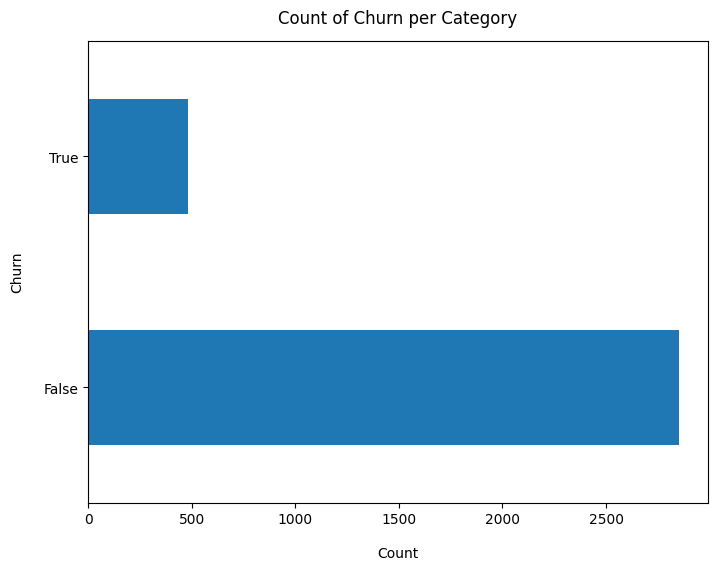

In [154]:
combined_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Count of Churn per Category", y=1.02)
plt.show()


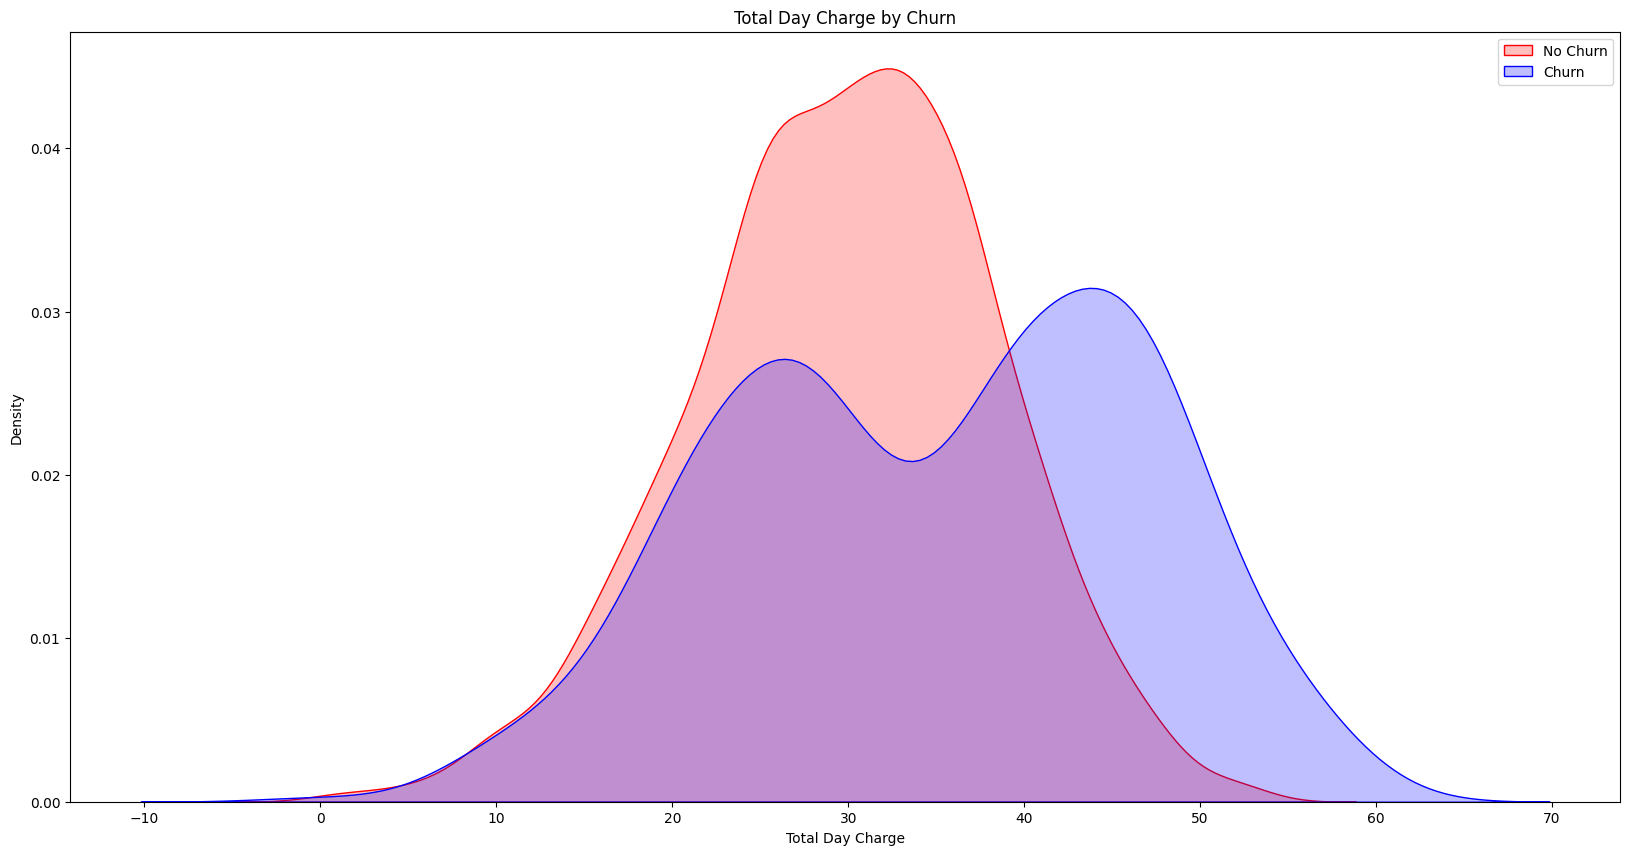

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create density plots for 'Total day charge' based on 'Churn'
Tot = sns.kdeplot(combined_data['Total day charge'][combined_data['Churn'] == 0],
                  color="Red", fill=True)
Tot = sns.kdeplot(combined_data['Total day charge'][combined_data['Churn'] == 1],
                  ax=Tot, color="Blue", fill=True)

# Add legend, labels, and title
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Day Charge')
Tot.set_title('Total Day Charge by Churn')

# Show the plot
plt.show()


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


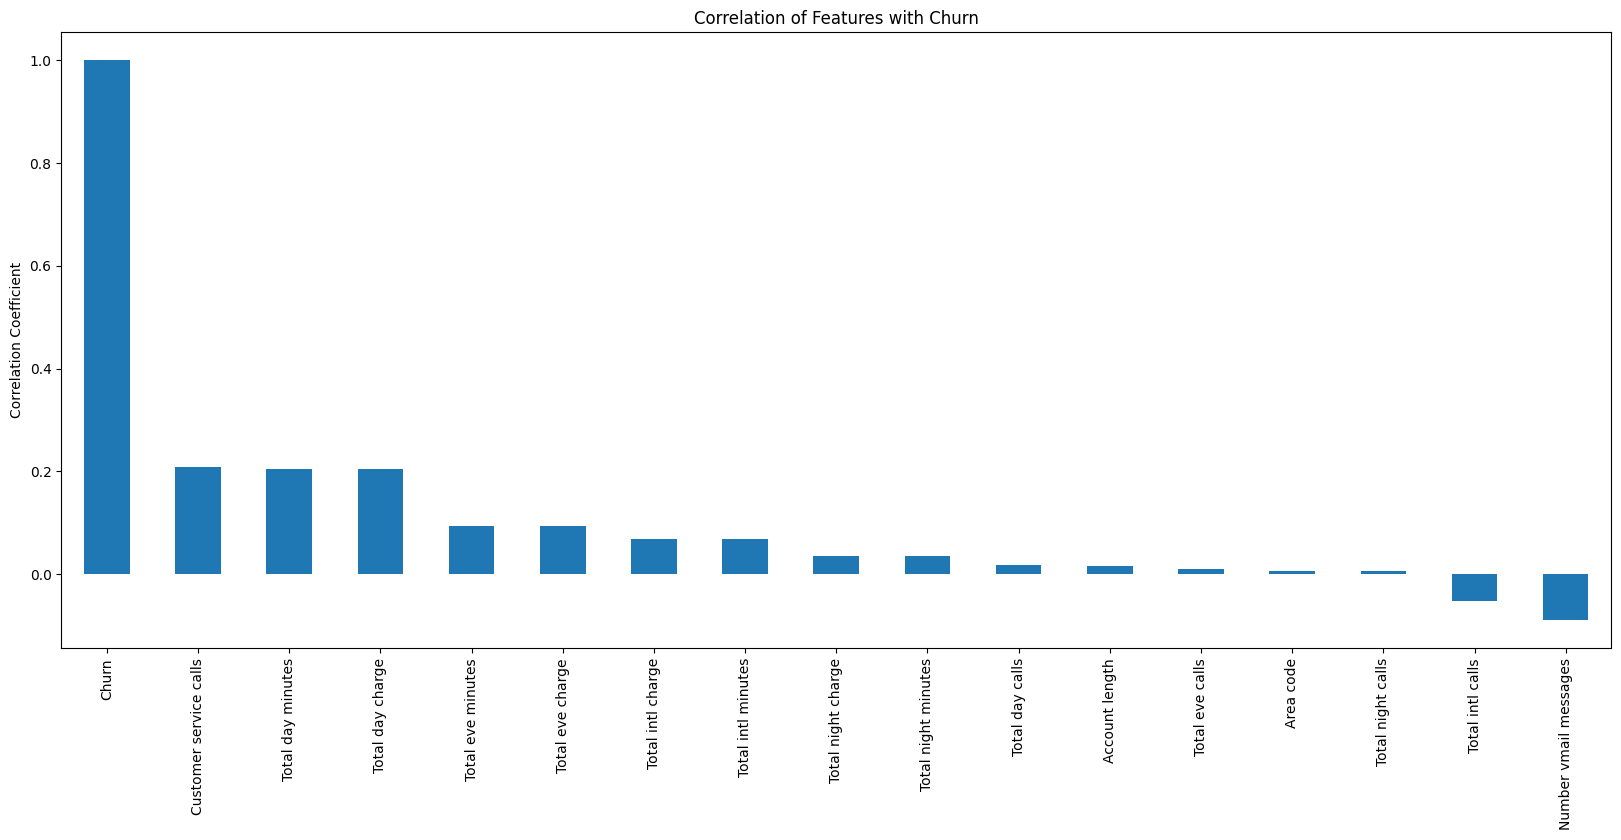

In [156]:
import matplotlib.pyplot as plt

# Check the column names to ensure 'Churn' exists
print(combined_data.columns)

# If 'Churn' exists but is in boolean format (True/False), convert it to 1/0
if 'Churn' in combined_data.columns and combined_data['Churn'].dtype == 'bool':
    combined_data['Churn'] = combined_data['Churn'].astype(int)

# Filter only numeric columns for correlation
numeric_cols = combined_data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = combined_data[numeric_cols].corr()

# Plot the correlation of 'Churn' with all other numeric variables
plt.figure(figsize=(20, 8))
corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.show()


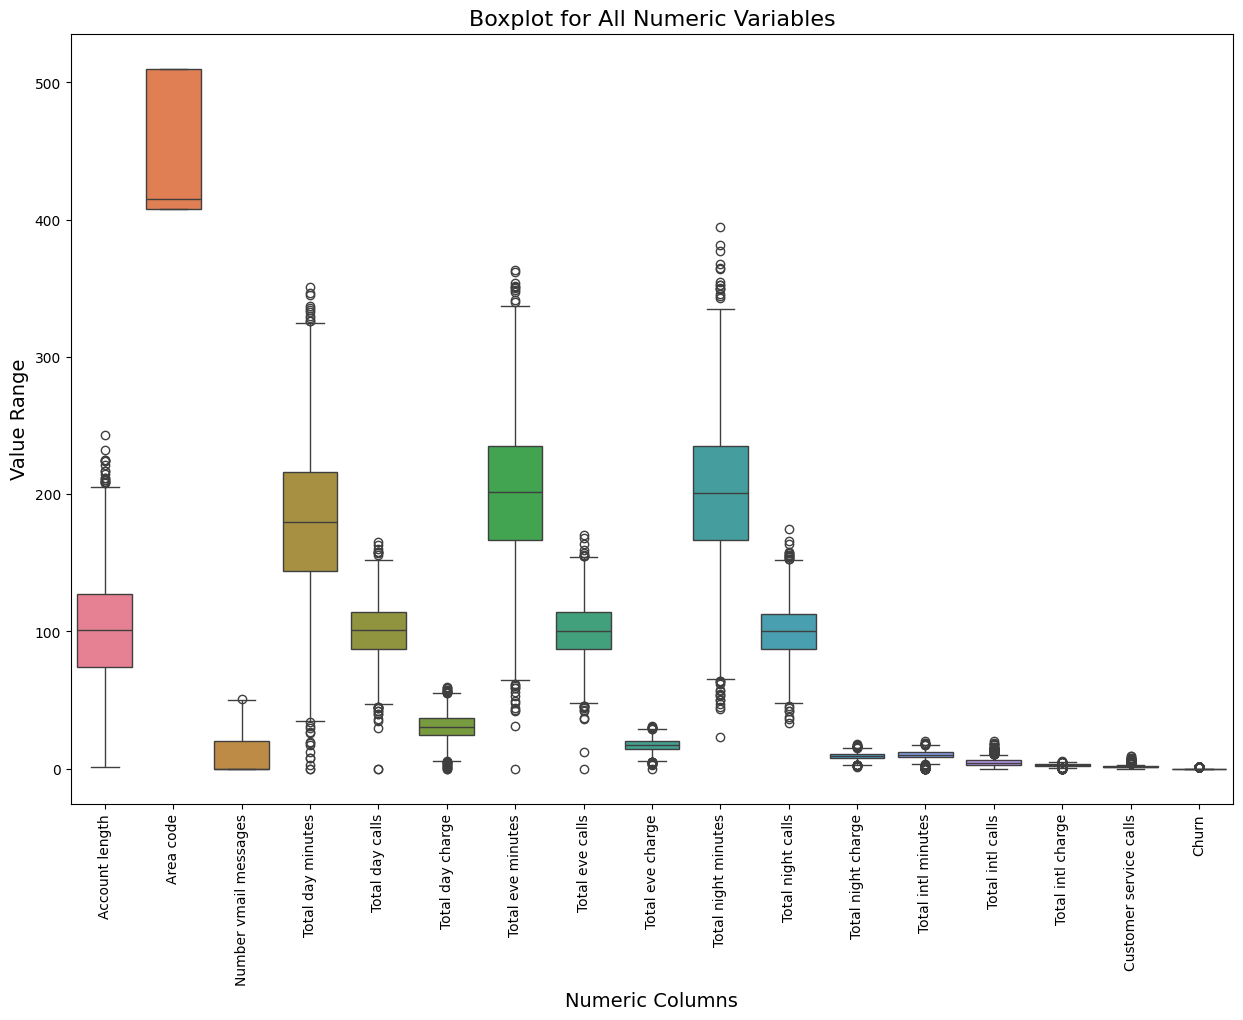

In [157]:
# Select numeric columns from combined_data
numeric_df = combined_data.select_dtypes(include=['float64', 'int64'])

# Create a boxplot for all numeric variables in a single plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df)

# Add title and rotate x-axis labels for better readability
plt.title('Boxplot for All Numeric Variables', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('Numeric Columns', fontsize=14)
plt.ylabel('Value Range', fontsize=14)

# Display the plot
plt.show()


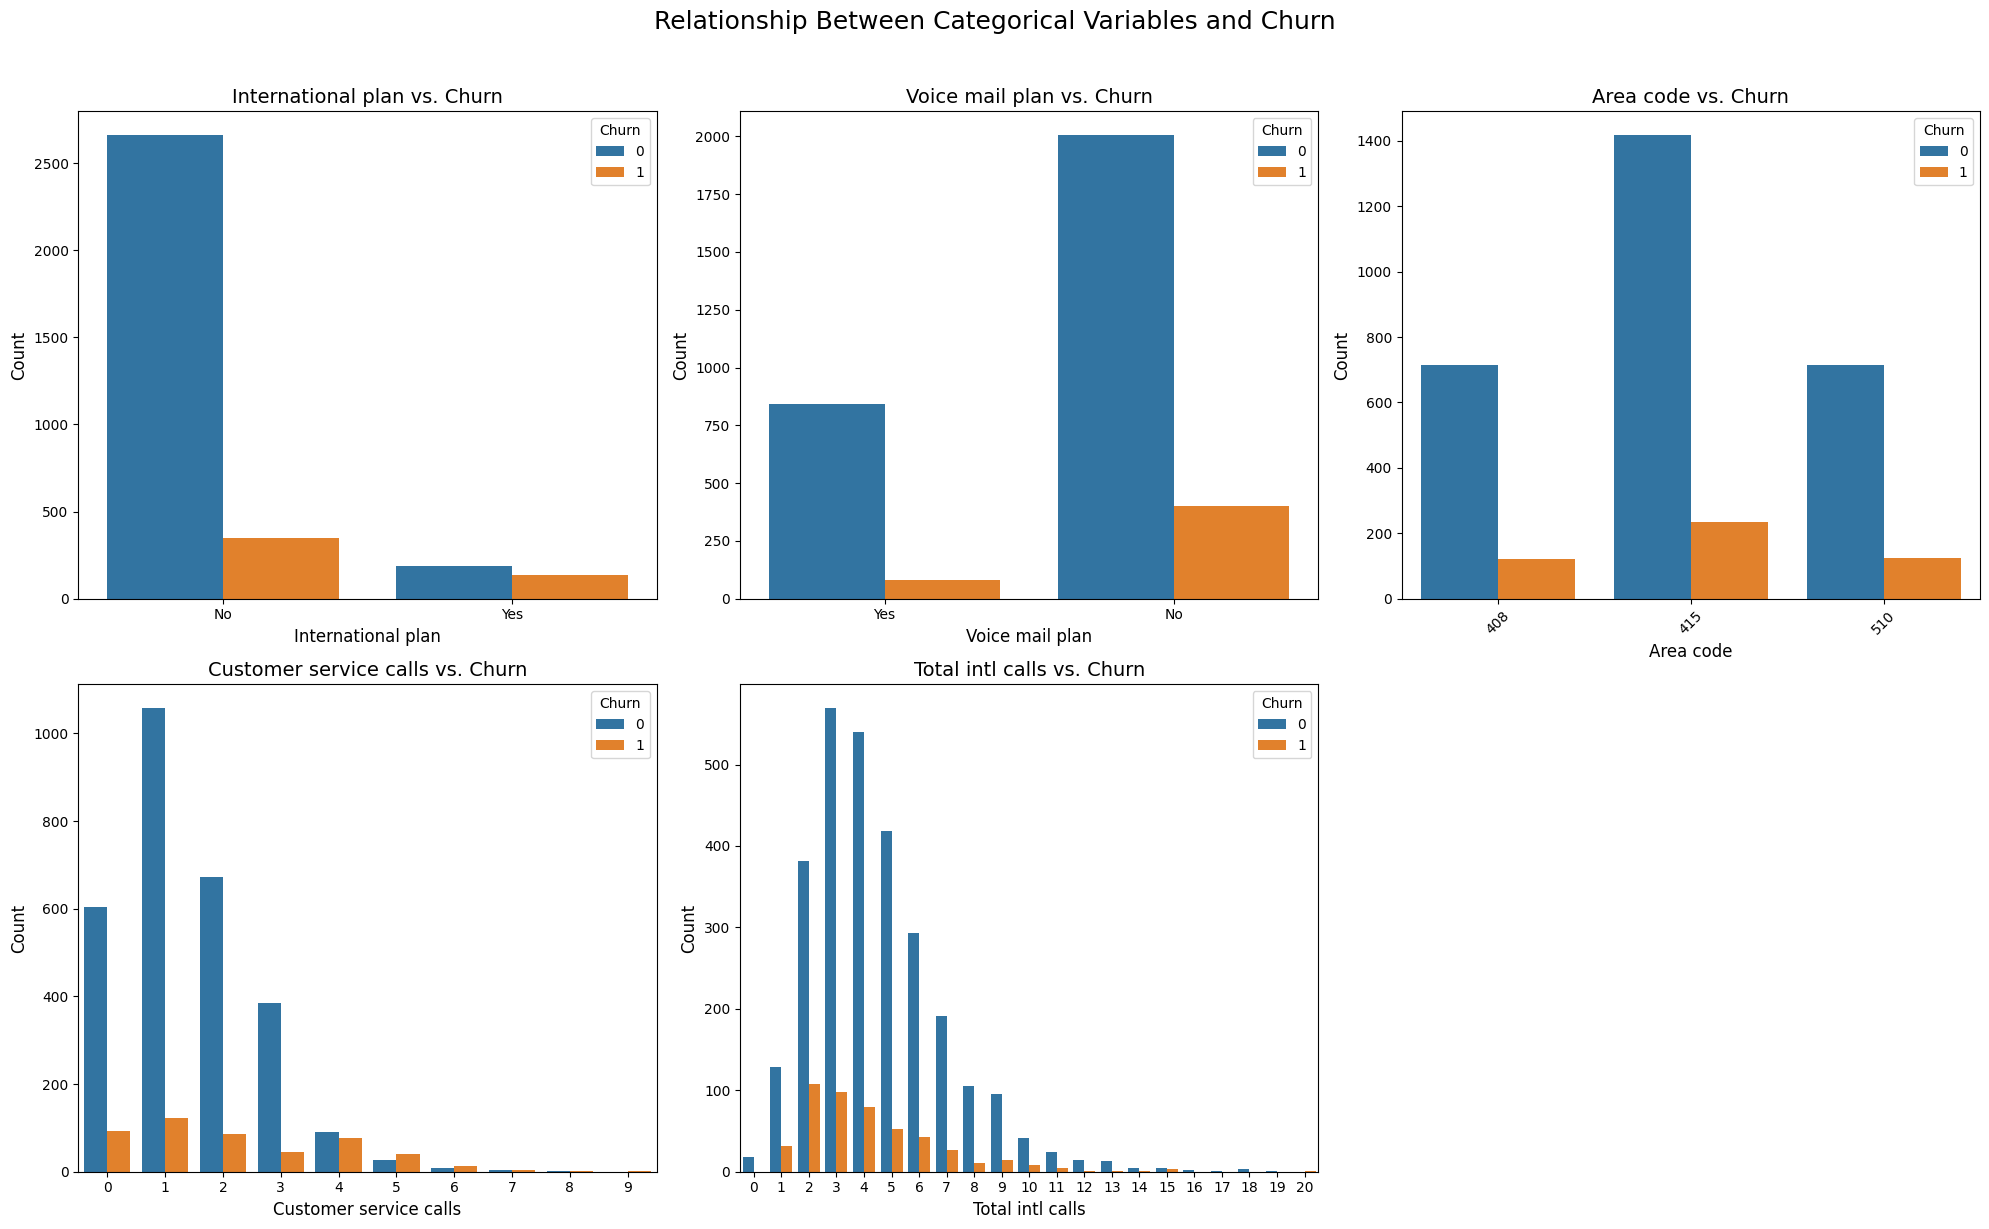

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure and axes
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))

# Customize plots with titles and axis labels
plots = [
    ('International plan', 0, 0),
    ('Voice mail plan', 0, 1),
    ('Area code', 0, 2),
    ('Customer service calls', 1, 0),
    ('Total intl calls', 1, 1),
]

for var, row, col in plots:
    sns.countplot(x=var, hue='Churn', data=combined_data, ax=axarr[row][col])
    axarr[row][col].set_title(f'{var} vs. Churn', fontsize=14)
    axarr[row][col].set_xlabel(var, fontsize=12)
    axarr[row][col].set_ylabel('Count', fontsize=12)
    axarr[row][col].tick_params(axis='x', rotation=45 if var == 'Area code' else 0)

# Remove empty subplot (2, 2) to clean up the layout
fig.delaxes(axarr[1][2])

# Add an overall title for the figure
fig.suptitle('Relationship Between Categorical Variables and Churn', fontsize=18, y=1.02)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


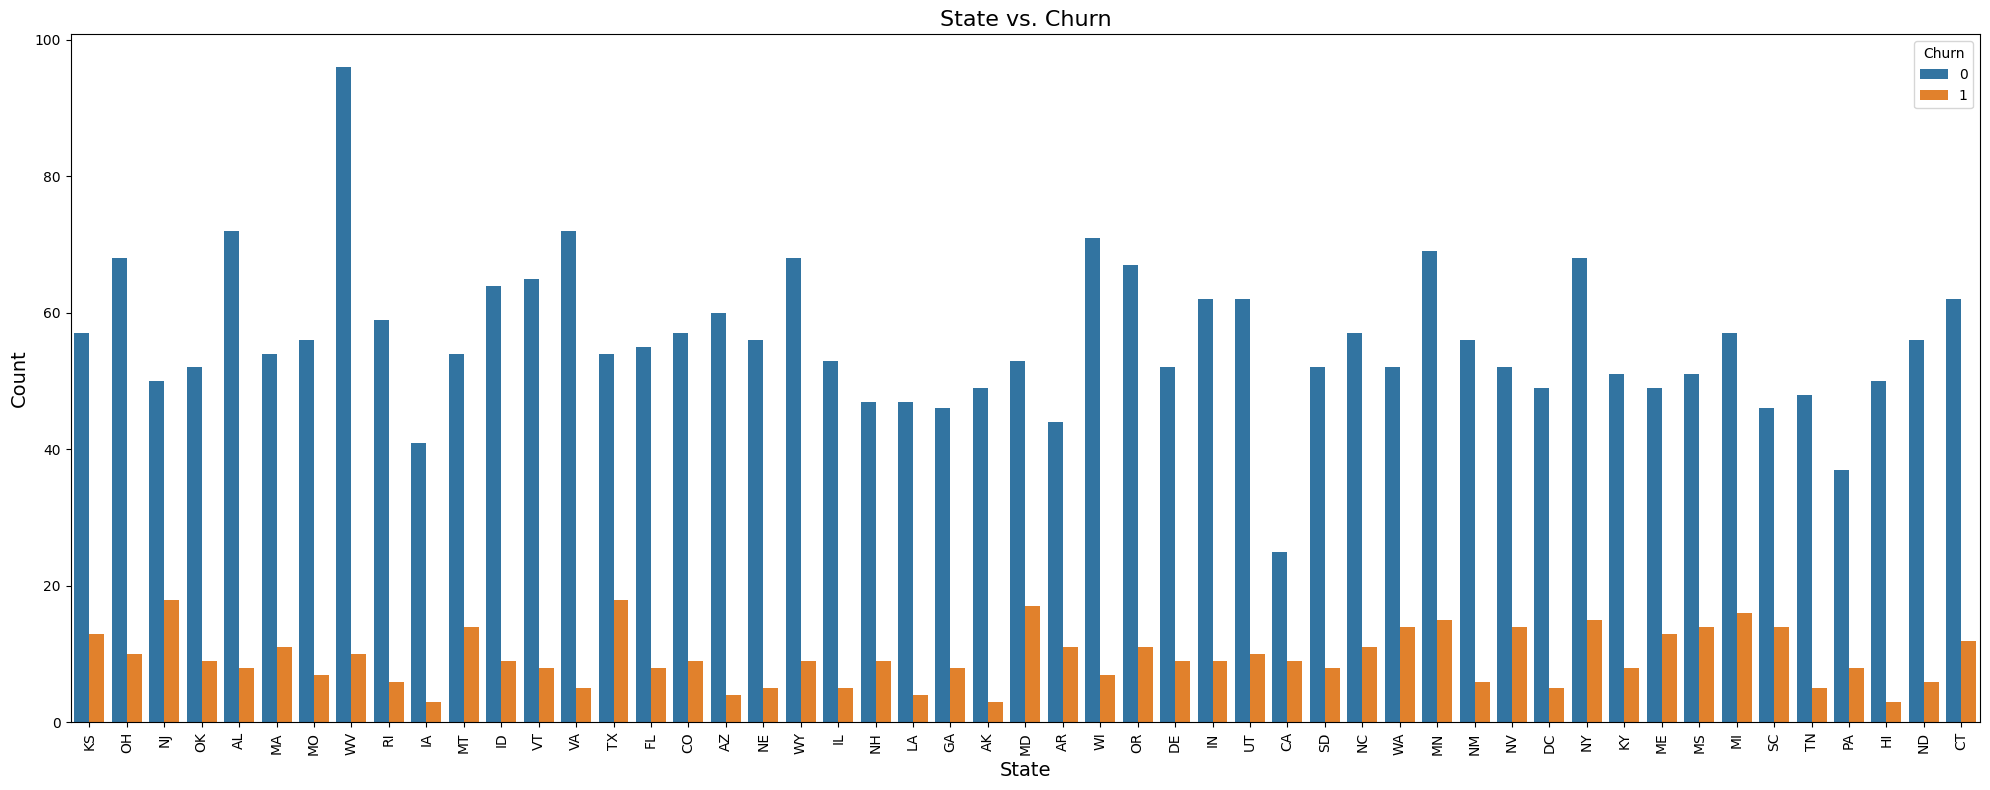

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Visualize the relationship between 'State' and 'Churn'
sns.countplot(x='State', hue='Churn', data=combined_data)

# Add labels and title
plt.title('State vs. Churn', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [160]:
import plotly.graph_objs as go
import plotly.offline as py

# Make sure 'combined_data' is the correct DataFrame
trace = go.Pie(
    labels=combined_data["Churn"].value_counts().keys().tolist(),
    values=combined_data["Churn"].value_counts().values.tolist(),
    marker=dict(
        colors=['royalblue', 'lime'],
        line=dict(color="white", width=1.3)
    ),
    rotation=90,
    hoverinfo="label+value+text",
    hole=0.5  # Make it a donut chart
)

layout = go.Layout(
    dict(
        title="Customer churn in training data",
        plot_bgcolor="rgb(243,243,243)",
        paper_bgcolor="rgb(243,243,243)",
    )
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [161]:
# # Separating columns to be visualized
# out_cols = list(set(combined_data.nunique()[combined_data.nunique() < 6].keys().tolist()
#                     + combined_data.select_dtypes(include='object').columns.tolist()))

# viz_cols = [x for x in combined_data.columns if x not in out_cols] + ['Churn']

# # Create a pairplot for the selected columns
# sns.pairplot(combined_data[viz_cols], diag_kind="kde")

# # Show the plot
# plt.show()


Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

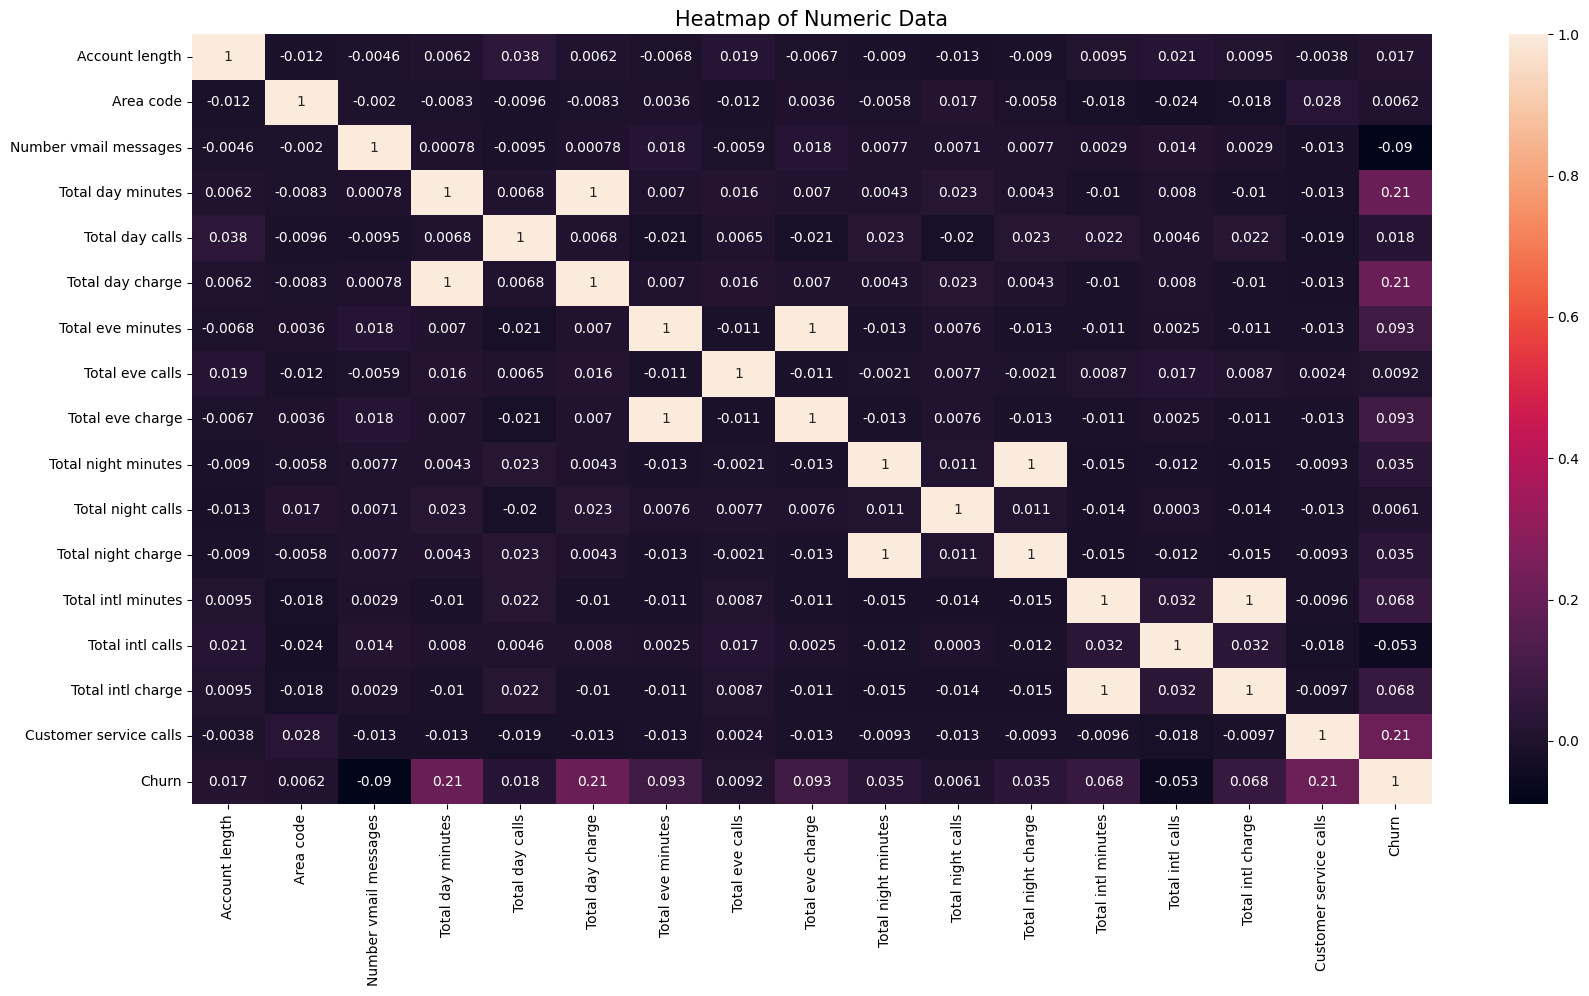

In [162]:
# Selecting numeric columns from the dataset
numeric_data = combined_data.select_dtypes(include=['float64', 'int64'])

# Setting the figure size for better visibility
plt.rcParams["figure.figsize"] = (20, 10)

# Creating a heatmap to visualize the correlation between numeric columns
sns.heatmap(numeric_data.corr(), annot=True)

# Adding title and adjusting font size
plt.title("Heatmap of Numeric Data", fontsize=15)

# Displaying the plot
plt.show()

## part 3 Data Preparation

1. Map and Encode Categorical Variables


In [163]:
d = {"No": 0, "Yes": 1}

In [164]:
combined_data["International plan"] = combined_data["International plan"].map(d)

In [165]:
pd.set_option('future.no_silent_downcasting', True)

combined_data = combined_data.replace({"Voice mail plan": d})

In [166]:
#Churn = 0: Customers who did not churn.
#Churn = 1: Customers who churned
combined_data["Churn"] = combined_data["Churn"].astype("int64")

In [167]:
combined_data.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415                   0               1   
1    OH             107        415                   0               1   
2    NJ             137        415                   0               0   
3    OH              84        408                   1               0   
4    OK              75        415                   1               0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

Frequency Encoding

In [168]:
# Frequency Encoding : remplacer les valeurs dans la colonne 'State'
frequency_encoding = combined_data["State"].value_counts()  # Calcul des fréquences
combined_data["State"] = combined_data["State"].map(frequency_encoding)  # Remplacer les catégories par leurs fréquences

# Vérification
print("Colonne 'State' après Frequency Encoding :")
print(combined_data.head())

Colonne 'State' après Frequency Encoding :
   State  Account length  Area code  International plan Voice mail plan  \
0     70             128        415                   0               1   
1     78             107        415                   0               1   
2     68             137        415                   0               0   
3     78              84        408                   1               0   
4     61              75        415                   1               0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4      

In [169]:
print(combined_data["State"])

0        70
1        78
2        68
3        78
4        61
       ... 
3328     78
3329     80
3330     73
3331    106
3332     74
Name: State, Length: 3333, dtype: int64


In [170]:
from sklearn.preprocessing import StandardScaler

# Assuming df_combined is your DataFrame
scaler = StandardScaler()

# Sélectionner uniquement les colonnes numériques pour la normalisation
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Exclure la variable cible 'Churn' des colonnes à normaliser
numeric_columns = numeric_columns.difference(['Churn'])

# Appliquer la standardisation sur les colonnes numériques (hors Churn)
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# Afficher les données normalisées
print(combined_data.head())

      State  Account length  Area code  International plan Voice mail plan  \
0  0.215216        0.676489  -0.523603           -0.327580               1   
1  0.888355        0.149065  -0.523603           -0.327580               1   
2  0.046931        0.902529  -0.523603           -0.327580               0   
3  0.888355       -0.428590  -0.688834            3.052685               0   
4 -0.542066       -0.654629  -0.523603            3.052685               0   

   Number vmail messages  Total day minutes  Total day calls  \
0               1.234883           1.566767         0.476643   
1               1.307948          -0.333738         1.124503   
2              -0.591760           1.168304         0.675985   
3              -0.591760           2.196596        -1.466936   
4              -0.591760          -0.240090         0.626149   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0          1.567036          -0.070610        -0.055940         -0.07

2. Scaling Numerical Features


In [171]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ["Total day minutes", "Total day charge", "Total eve minutes", "Total eve charge","Customer service calls","Total intl calls","Number vmail messages","Total night calls","Total day calls" ,"State","Area code",
                  "Total night minutes", "Total night charge", "Total intl minutes","Account length","International plan","Voice mail plan", "Total intl charge","Total eve calls","Total eve charge","Total intl charge"]

scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

PCA

Explained variance for each principal component:
Principal Component 1: 0.1079
Principal Component 2: 0.1073
Principal Component 3: 0.1052
Principal Component 4: 0.1041
Principal Component 5: 0.1010
Principal Component 6: 0.0569
Principal Component 7: 0.0553
Principal Component 8: 0.0541
Principal Component 9: 0.0534
Principal Component 10: 0.0524
Principal Component 11: 0.0517
Principal Component 12: 0.0504
Principal Component 13: 0.0499
Principal Component 14: 0.0483
Principal Component 15: 0.0023
Principal Component 16: 0.0000
Principal Component 17: 0.0000
Principal Component 18: 0.0000
Principal Component 19: 0.0000


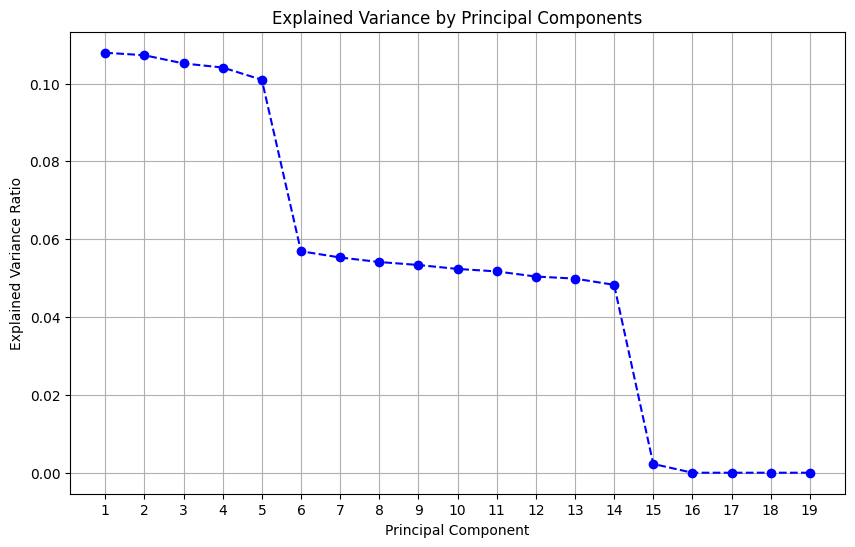

Total explained variance: 1.0000


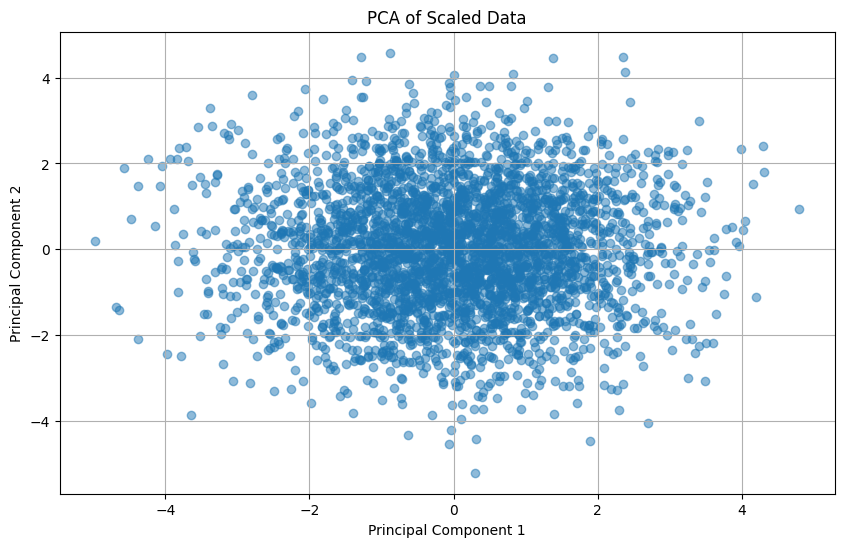

In [217]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming combined_data is your DataFrame containing the scaled values
# Ensure you have already preprocessed your data as necessary

# Step 1: Select all numerical features for PCA
pca_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the target variable if it's included in the numeric features
if 'Churn' in pca_columns:
  pca_columns.remove('Churn')  # Remove the target variable from PCA features

# Create DataFrame specifically for PCA
X = combined_data[pca_columns]

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 3: Analyze the results
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance values
print("Explained variance for each principal component:")
for i, variance in enumerate(explained_variance, start=1):
  print(f"Principal Component {i}: {variance:.4f}")

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# To reduce to 2 dimensions, fit PCA again with n_components=2
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Visualization of the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Calculate and display the total explained variance
total_variance_explained = sum(explained_variance)
print(f"Total explained variance: {total_variance_explained:.4f}")

plt.grid(True)
plt.show()

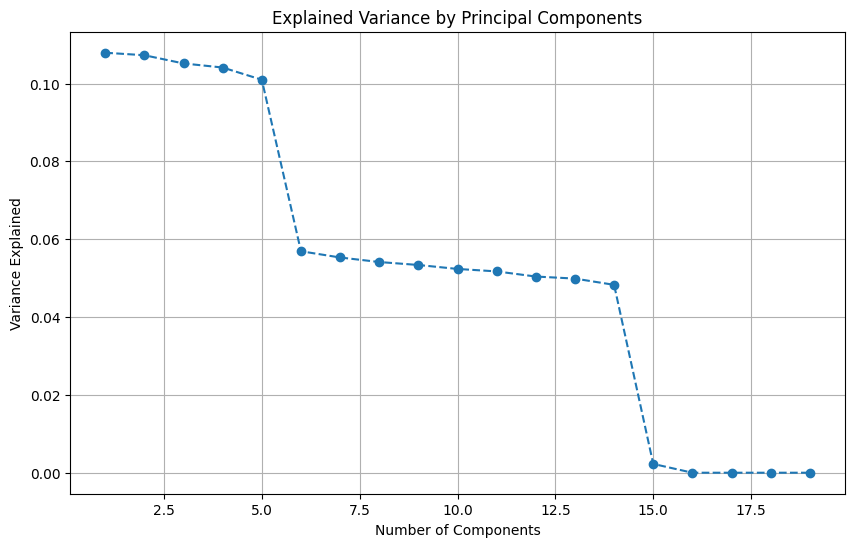

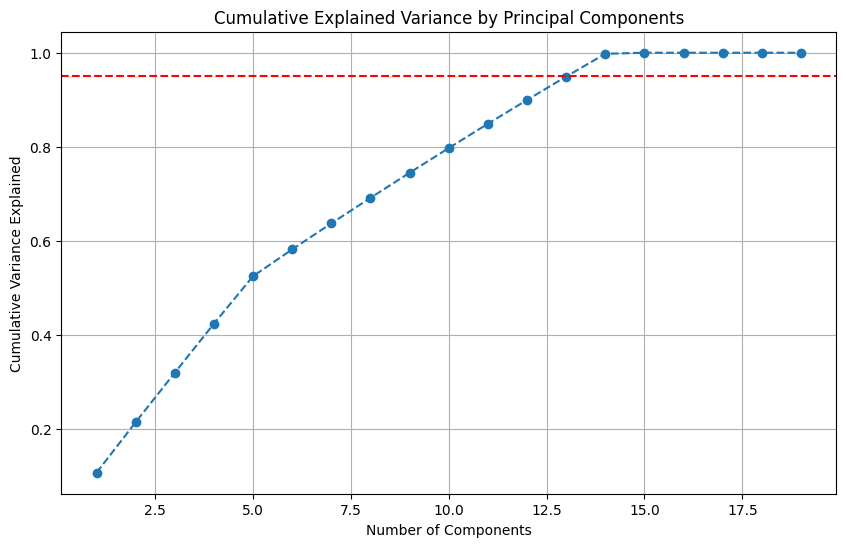

Optimal number of components to retain 95% variance: 14


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace this with your data loading method)
# For demonstration, we'll recreate the DataFrame as in your example
data =combined_data

df = pd.DataFrame(data)

# Step 1: One-hot encode categorical variables including 'State'
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Separate features and target variable 'Churn'
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Step 3: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 4: Compute PCA
pca = PCA()
pca.fit(scaled_data)

# Step 5: Determine the Optimal Number of Components
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% explained variance line
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

# Print the number of components needed to reach 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal number of components to retain 95% variance: {optimal_components}')

clustering

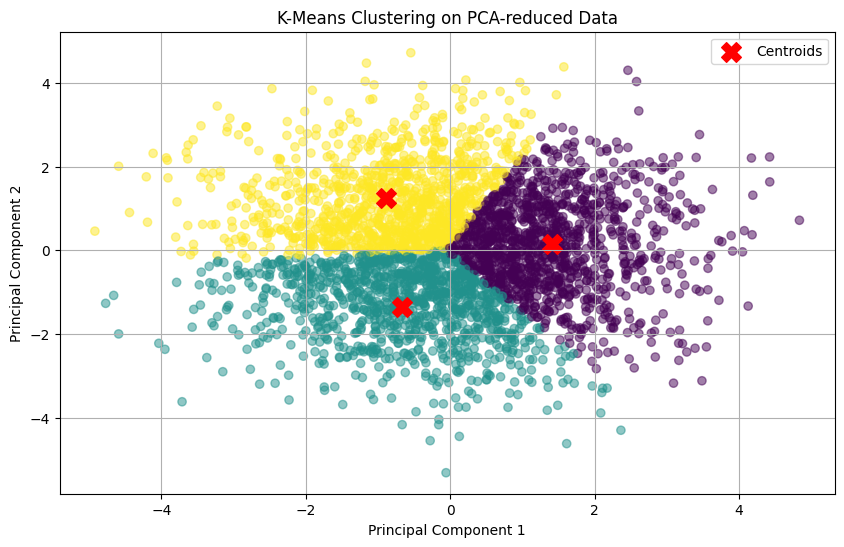

In [173]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming combined_data is your DataFrame containing the scaled values

# Step 1: Select all numerical features for PCA
pca_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create DataFrame specifically for PCA
X = combined_data[pca_columns]

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Step 3: Apply K-Means Clustering
n_clusters = 3  # You can change this number based on your specific needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca_2d)

# Get cluster labels
labels = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Optionally, plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]



Best number of clusters: 2


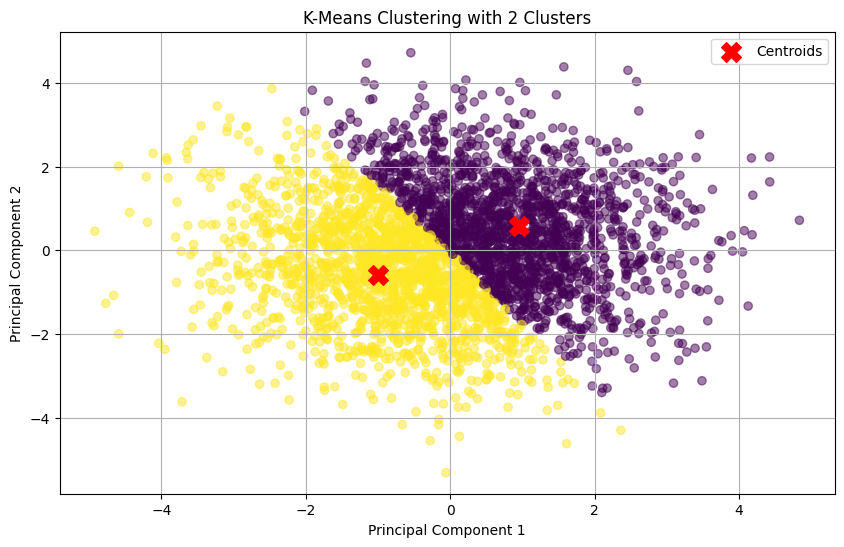

In [174]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
import matplotlib.pyplot as plt

# Assuming combined_data is your DataFrame containing the scaled values

# Step 1: Select all numerical features for PCA
pca_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = combined_data[pca_columns]

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Step 3: Set up K-Means
kmeans = KMeans(random_state=42)

# Define the parameter grid to search
param_grid = {
  'n_clusters': range(2, 11)  # Test cluster sizes from 2 to 10
}

# Custom scorer for silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Setting up the GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_pca_2d)

# Get the best number of clusters
best_n_clusters = grid_search.best_params_['n_clusters']
print(f'Best number of clusters: {best_n_clusters}')

# Fit K-Means with the best number of clusters
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
best_kmeans.fit(X_pca_2d)

# Get cluster labels from the best model
labels = best_kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering with {best_n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Optionally, plot cluster centers
centers = best_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.grid()
plt.show()

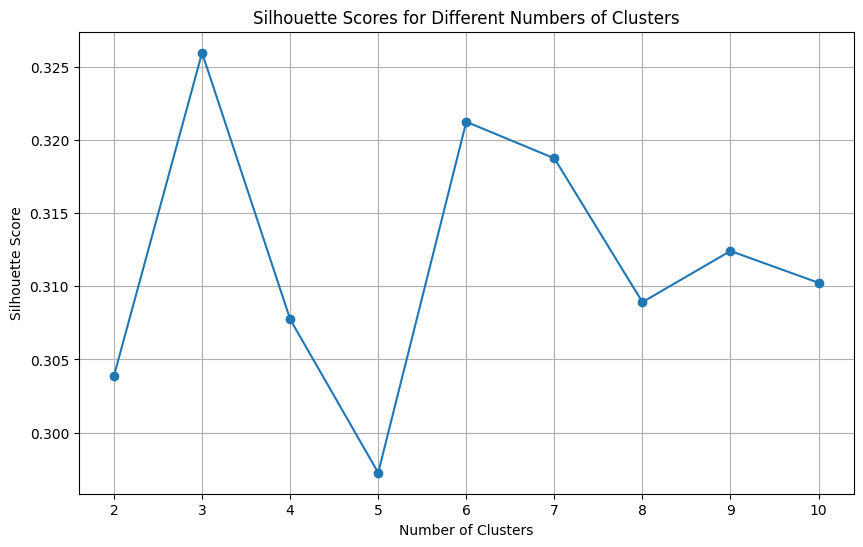

In [175]:
from sklearn.metrics import silhouette_score

# Adding a function to evaluate silhouette scores
silhouette_scores = []

for n_clusters in range(2, 11):  # Testing for clusters from 2 to 10
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  labels = kmeans.fit_predict(X_pca_2d)
  silhouette_avg = silhouette_score(X_pca_2d, labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Optimal Cluster Selection:
The optimal number of clusters appears to be either k=3 based on the high silhouette scores. These configurations are most suitable for separating the data into meaningful clusters.

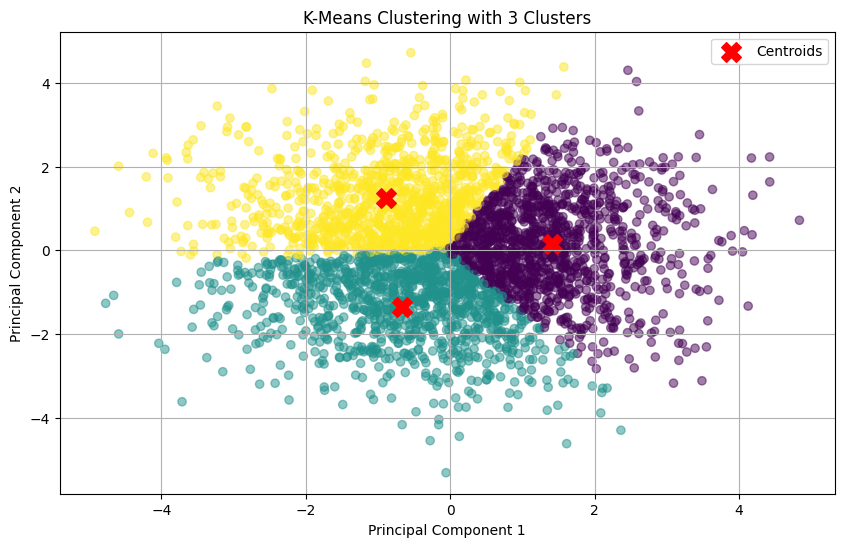

In [176]:
# For 2 Clusters
n_clusters = 3
best_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
best_kmeans.fit(X_pca_2d)

# Get cluster labels
labels = best_kmeans.labels_

# Visualization of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot cluster centers
centers = best_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.grid()
plt.show()

methode de coude


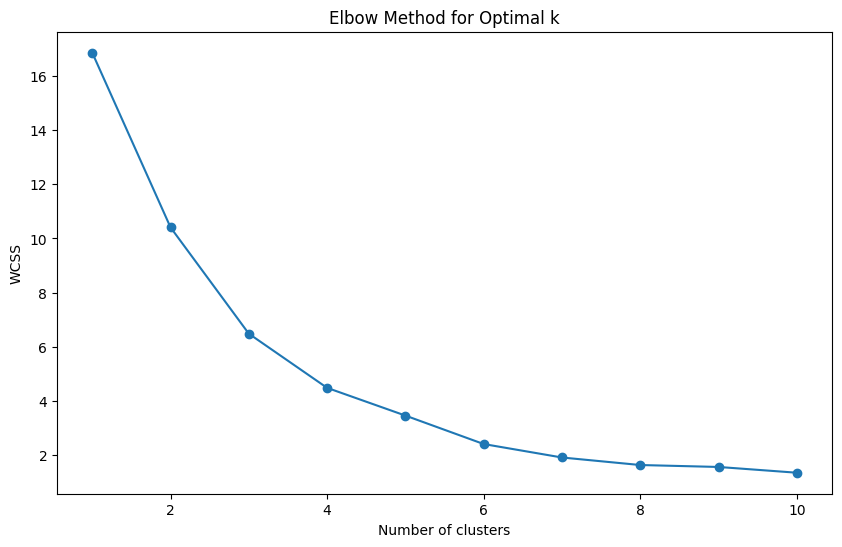

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data
data = np.random.rand(100, 2)  # Replace with your dataset

# Range of clusters
range_k = range(1, 11)
wcss = []

# KMeans clustering and WCSS calculation
for k in range_k:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)  # WCSS value

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

After k=3, the decrease in WCSS slows down, suggesting diminishing returns in reducing WCSS as more clusters are added. This behavior is typical and suggests that k=3 or k=4 might be optimal.

##PART 4 MODELING


DSO 1

feature selection :decision tree


In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Supposons que vos données sont déjà chargées dans 'df_combined'
# Assurez-vous que vos colonnes catégoriques sont encodées (par exemple, Frequency Encoding)

# Séparer les variables explicatives (features) et la variable cible (target)
X = combined_data.drop(columns=["Churn"])  # Toutes les colonnes sauf 'Churn'
y = combined_data["Churn"]  # Colonne cible

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner un Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédictions (facultatif)
y_pred = dt_model.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")

# Calculer l'importance des caractéristiques
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Afficher les importances
print("Feature Importances :")
print(feature_importances)

Accuracy on test set: 0.90
Feature Importances :
                   Feature  Importance
6        Total day minutes    0.219861
9        Total eve minutes    0.120949
18  Customer service calls    0.110841
17       Total intl charge    0.085337
3       International plan    0.076225
16        Total intl calls    0.071998
5    Number vmail messages    0.044110
8         Total day charge    0.043658
12     Total night minutes    0.031132
14      Total night charge    0.030473
13       Total night calls    0.030445
15      Total intl minutes    0.027220
7          Total day calls    0.027082
4          Voice mail plan    0.020263
10         Total eve calls    0.015923
1           Account length    0.013163
11        Total eve charge    0.011305
0                    State    0.010666
2                Area code    0.009352


<ipython-input-179-a010aefd6256>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




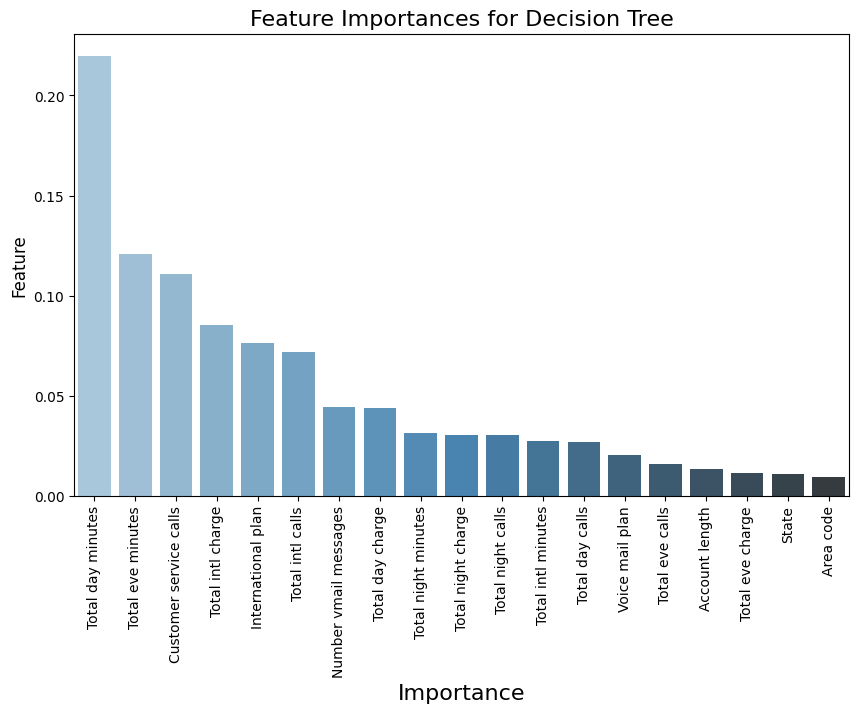

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'feature_importances' a été défini dans le contexte de votre modèle
# 'feature_importances' contient les caractéristiques et leurs importances, ordonné par importance décroissante

# Créer une figure avec une taille adaptée
plt.figure(figsize=(10, 6))

# Tracer le graphique avec des barres horizontales et ajouter un dégradé de couleur
sns.barplot(x='Feature',y='Importance', data=feature_importances, palette='Blues_d')

# Ajouter un titre et des labels aux axes
plt.title("Feature Importances for Decision Tree", fontsize=16)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=12)
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

Feature selction : Random forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vos données sont déjà chargées dans 'df_combined'
# Assurez-vous que vos colonnes catégoriques sont encodées (par exemple, Frequency Encoding)

# Séparer les variables explicatives (features) et la variable cible (target)
X = combined_data.drop(columns=["Churn"])  # Toutes les colonnes sauf 'Churn'
y = combined_data["Churn"]  # Colonne cible

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner un Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions (facultatif)
y_pred = rf_model.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.2f}")

# Calculer l'importance des caractéristiques
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Afficher les importances
print("Feature Importances :")
print(feature_importances)

Accuracy on test set: 0.95
Feature Importances :
                   Feature  Importance
6        Total day minutes    0.139615
8         Total day charge    0.131393
18  Customer service calls    0.117440
3       International plan    0.083478
9        Total eve minutes    0.066046
11        Total eve charge    0.065042
16        Total intl calls    0.043449
15      Total intl minutes    0.043037
17       Total intl charge    0.038624
14      Total night charge    0.037875
7          Total day calls    0.036405
12     Total night minutes    0.035428
13       Total night calls    0.029699
1           Account length    0.029528
10         Total eve calls    0.027671
5    Number vmail messages    0.026837
0                    State    0.022983
4          Voice mail plan    0.018184
2                Area code    0.007268


<ipython-input-181-f1f608adeea7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




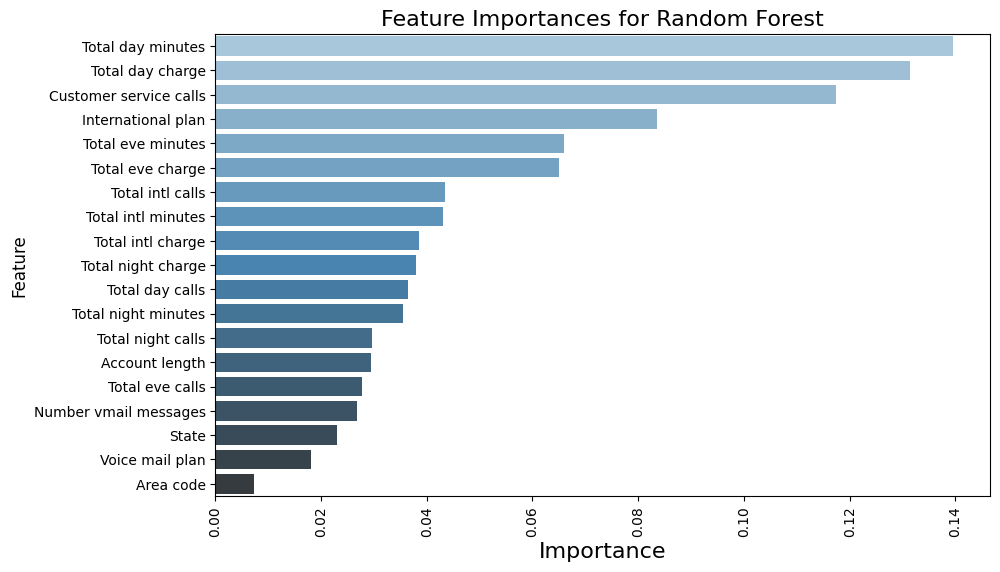

In [181]:
# Créer une figure avec une taille adaptée
plt.figure(figsize=(10, 6))

# Tracer le graphique avec des barres horizontales et ajouter un dégradé de couleur
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_d')

# Ajouter un titre et des labels aux axes
plt.title("Feature Importances for Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=12)
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

Decision tree

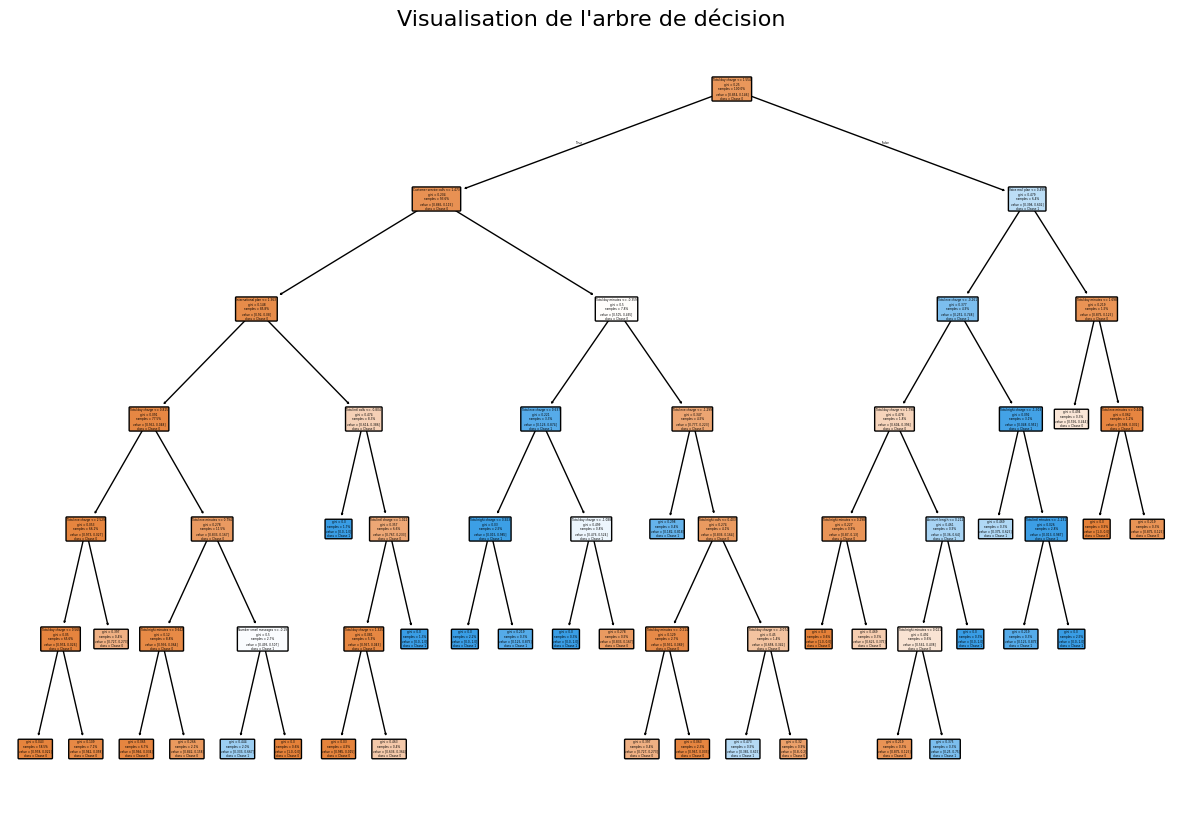

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialisation du modèle Decision Tree
model_dt = DecisionTreeClassifier(
    criterion="gini",         # Critère pour évaluer les splits (par exemple, "gini" ou "entropy")
    max_depth=6,              # Profondeur maximale de l'arbre
    min_samples_leaf=8,       # Nombre minimum d'échantillons par feuille
    random_state=100          # Pour des résultats reproductibles
)

# Entraînement du modèle avec les données d'entraînement
model_dt.fit(X_train, y_train)


# Visualiser l'arbre de décision
plt.figure(figsize=(15, 10))  # Ajuster la taille du graphique
plot_tree(
    model_dt,                # Modèle Decision Tree entraîné
    feature_names=X_train.columns,  # Noms des colonnes (features)
    class_names=["Classe 0", "Classe 1"],  # Noms des classes (adaptez selon vos classes)
    filled=True,             # Remplir les nœuds avec des couleurs
    rounded=True,            # Coins arrondis pour une meilleure lisibilité
    proportion=True          # Afficher les proportions au lieu des counts absolus
)
plt.title("Visualisation de l'arbre de décision", fontsize=16)
plt.show()

Complete Code Example Using SMOTE with ENN and Visualization


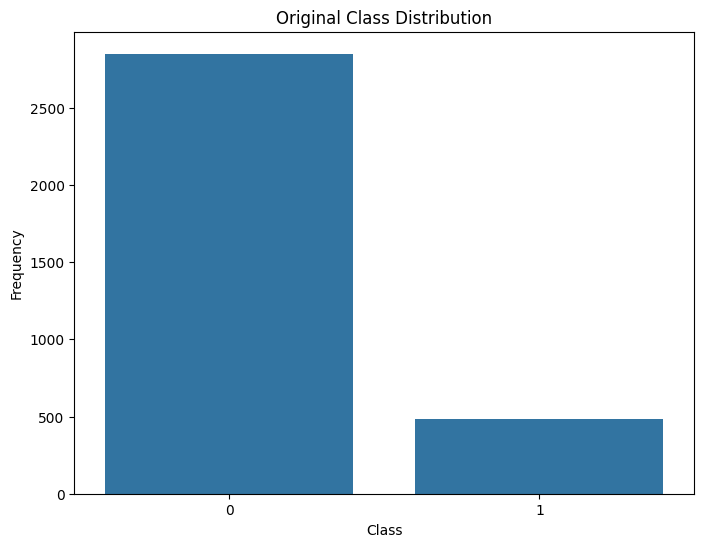

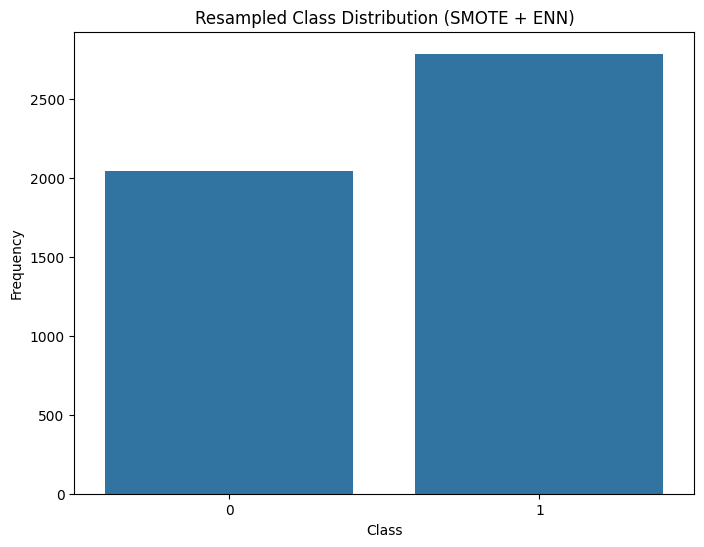

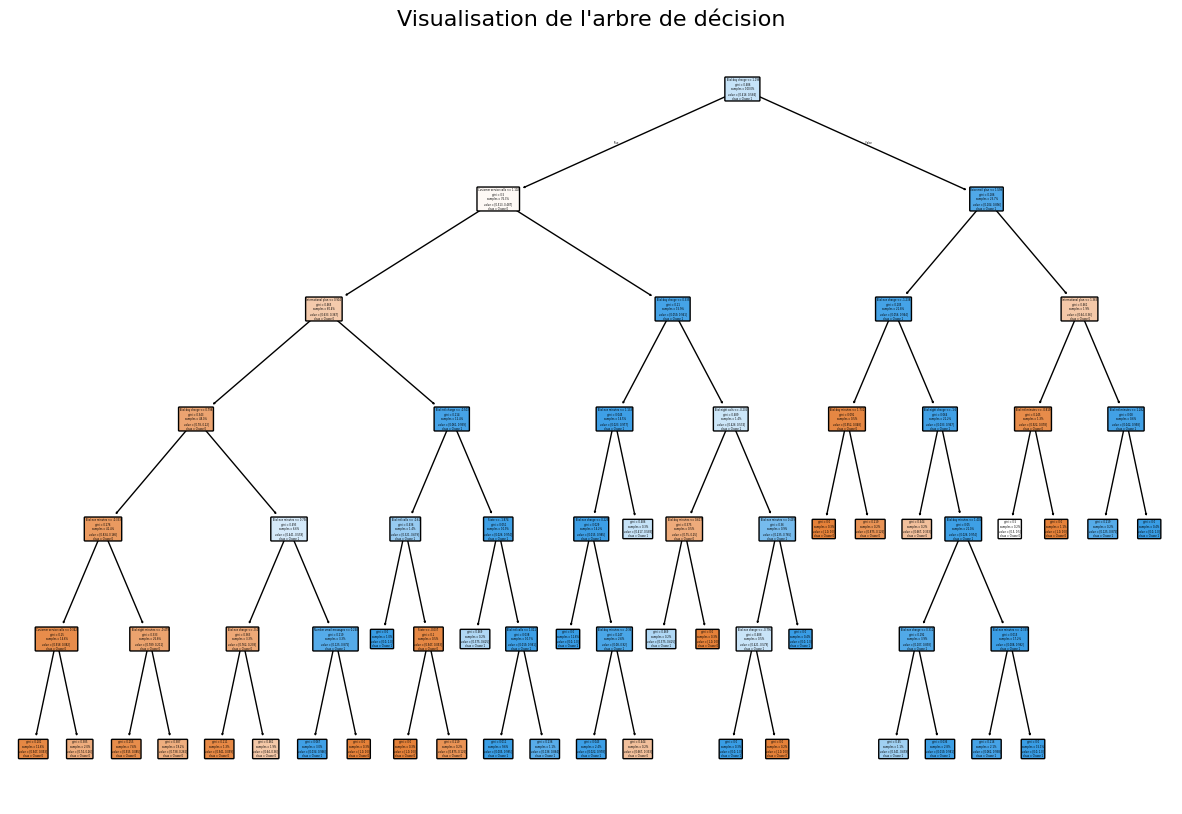

In [183]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
# Assume X and y are already defined. For example:
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable

# Visualize the original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Apply SMOTE and ENN to balance classes
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)  # Use fit_resample

# Visualize the new class distribution after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (SMOTE + ENN)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(
  criterion="gini",
  max_depth=6,
  min_samples_leaf=8,
  random_state=100
)

# Train the model with the training data
model_dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust the size of the plot
plot_tree(
  model_dt,
  feature_names=X_train.columns,  # Names of the features
  class_names=["Classe 0", "Classe 1"],  # Adjust according to your class labels
  filled=True,
  rounded=True,
  proportion=True
)
plt.title("Visualisation de l'arbre de décision", fontsize=16)
plt.show()

Complete Code Example with Manual Upsampling

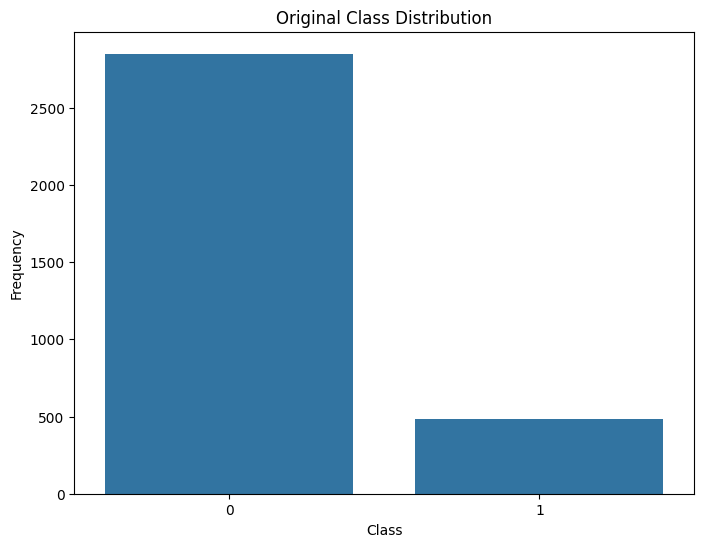

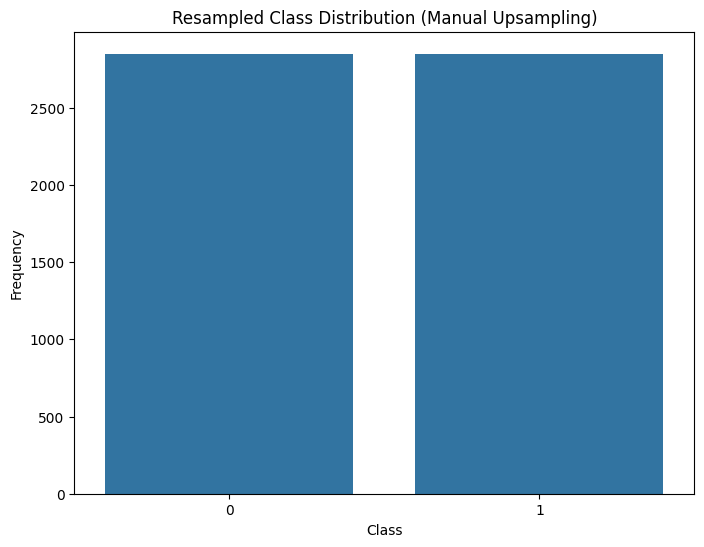

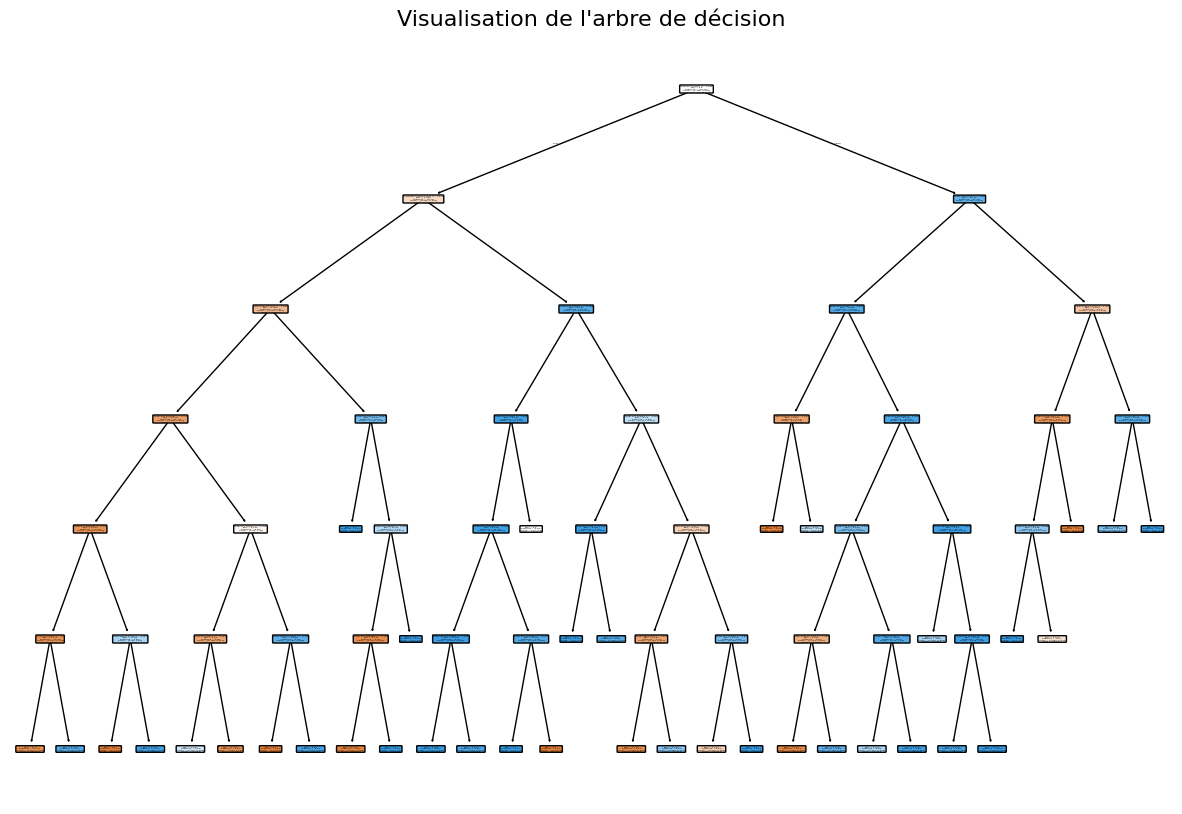

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable

# Visualize the original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Manual Upsampling
# Identify the minority and majority classes
class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Upsample the minority class
minority_class_data = combined_data[combined_data['Churn'] == minority_class]
upsampled_minority_class_data = minority_class_data.sample(class_counts[majority_class], replace=True)

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([combined_data[combined_data['Churn'] == majority_class], upsampled_minority_class_data])

# Separate features and target
X_resampled = upsampled_data[numerical_cols]  # Features
y_resampled = upsampled_data['Churn']  # Target

# Visualize the new class distribution after upsampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (Manual Upsampling)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(
  criterion="gini",
  max_depth=6,
  min_samples_leaf=8,
  random_state=100
)

# Train the model with the training data
model_dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust the size of the plot
plot_tree(
  model_dt,
  feature_names=X_train.columns,  # Names of the features
  class_names=["Classe 0", "Classe 1"],  # Adjust according to your class labels
  filled=True,
  rounded=True,
  proportion=True
)
plt.title("Visualisation de l'arbre de décision", fontsize=16)
plt.show()

Random Forest

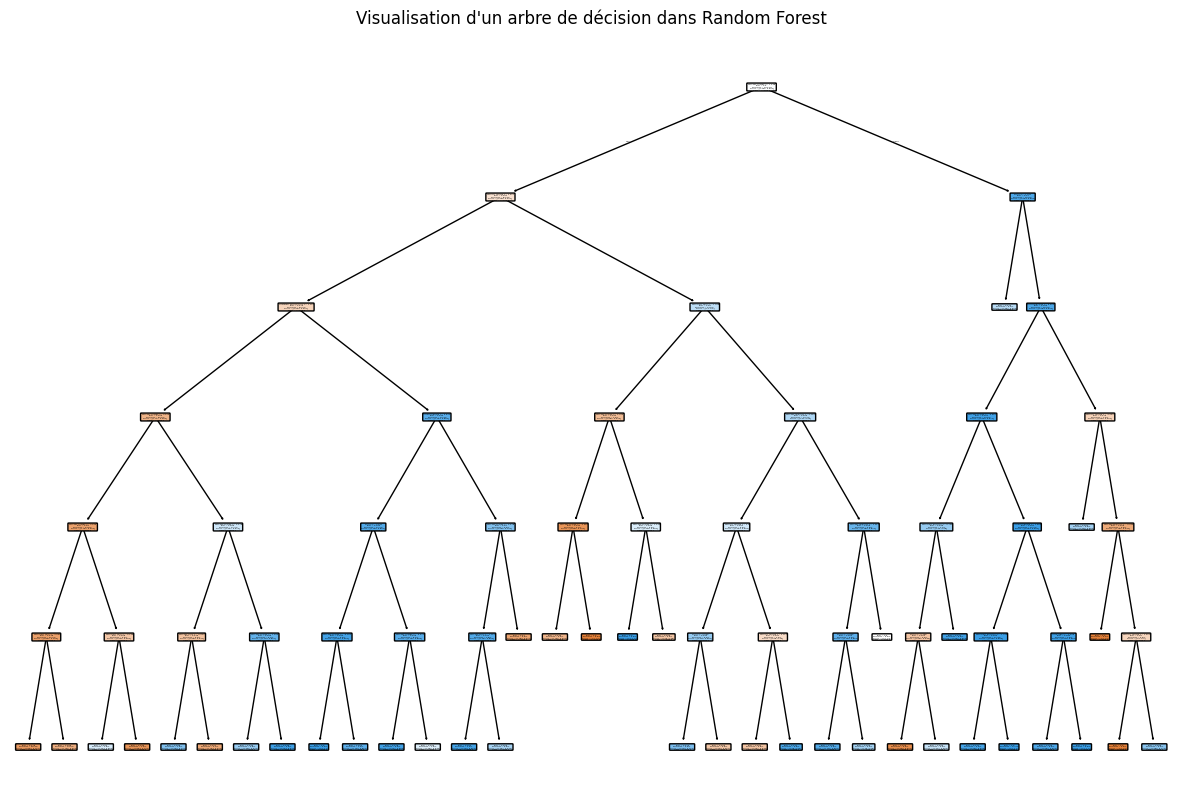

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Créer et entraîner le modèle Random Forest
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)

# Choisir un arbre spécifique de la forêt (par exemple, le premier arbre)
estimator = model_rf.estimators_[0]  # Le premier arbre dans la forêt

# Visualisation de l'arbre
plt.figure(figsize=(15, 10))  # Ajuster la taille du graphique
plot_tree(
    estimator,                # Arbre individuel du modèle Random Forest
    feature_names=X_train.columns,  # Noms des colonnes (features)
    class_names=["Classe 0", "Classe 1"],  # Noms des classes (adaptez selon vos classes)
    filled=True,             # Remplir les nœuds avec des couleurs
    rounded=True,            # Coins arrondis pour une meilleure lisibilité
    proportion=True          # Afficher les proportions au lieu des counts absolus
)
plt.title("Visualisation d'un arbre de décision dans Random Forest")
plt.show()

Complete Code Example with SMOTE + ENN for Random Forest

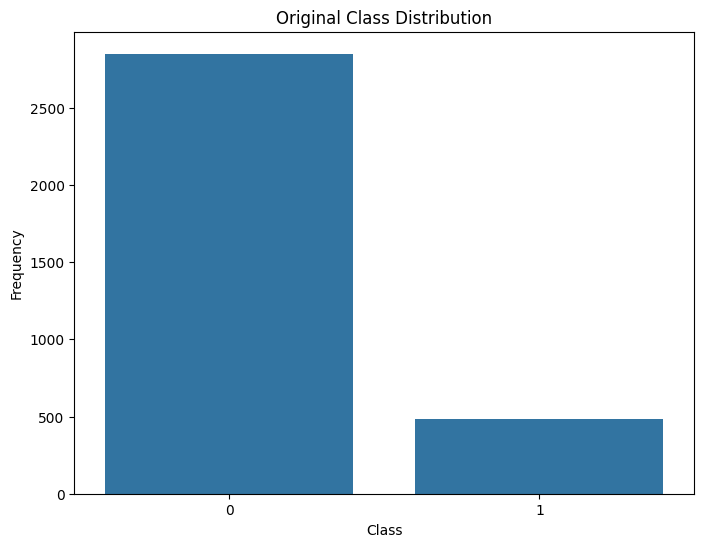

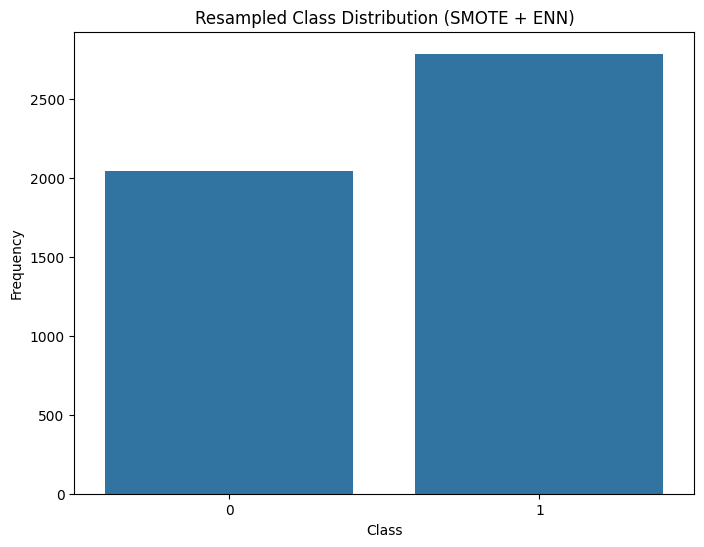

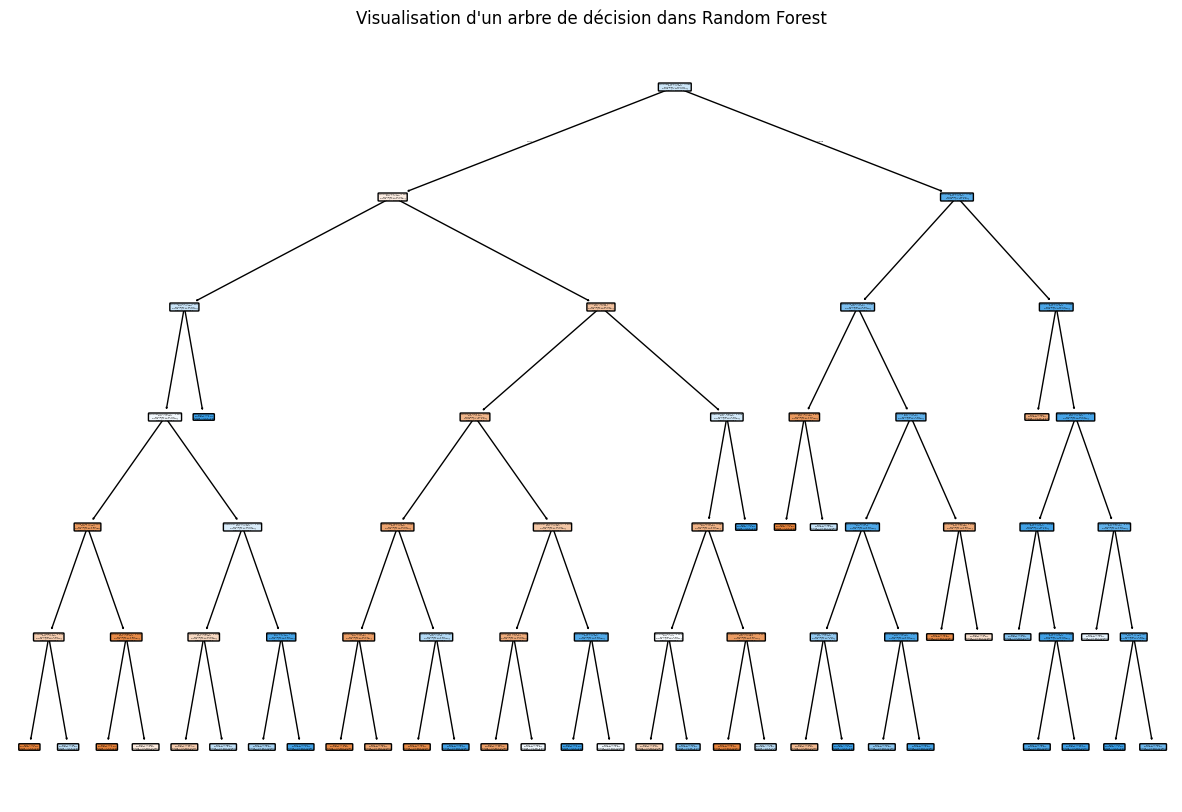

In [186]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable

# Visualize the original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Apply SMOTE and ENN to balance classes
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)  # Use fit_resample

# Visualize the new class distribution after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (SMOTE + ENN)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(
  n_estimators=100,  # Number of trees in the forest
  criterion='gini',  # For measuring the quality of a split
  max_depth=6,  # Maximum depth of the trees
  min_samples_leaf=8,  # Minimum samples required to be at a leaf node
  random_state=100  # For reproducibility
)

# Train the model with the training data
model_rf.fit(X_train, y_train)

# Choose a specific tree from the forest (for visualization)
estimator = model_rf.estimators_[0]  # The first tree in the forest

# Visualize the selected tree
plt.figure(figsize=(15, 10))  # Adjust the size of the plot
plot_tree(
  estimator,
  feature_names=X_train.columns,  # Names of the features
  class_names=["Classe 0", "Classe 1"],  # Adjust according to your class labels
  filled=True,
  rounded=True,
  proportion=True
)
plt.title("Visualisation d'un arbre de décision dans Random Forest")
plt.show()

Complete Code Example with Manual Upsampling

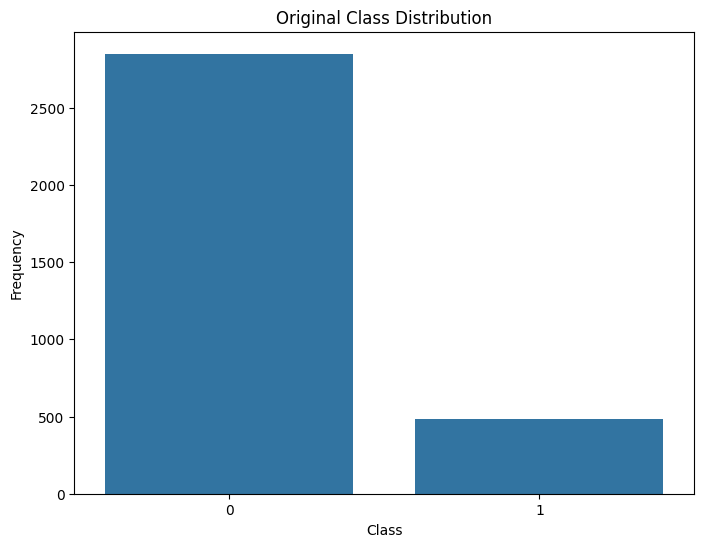

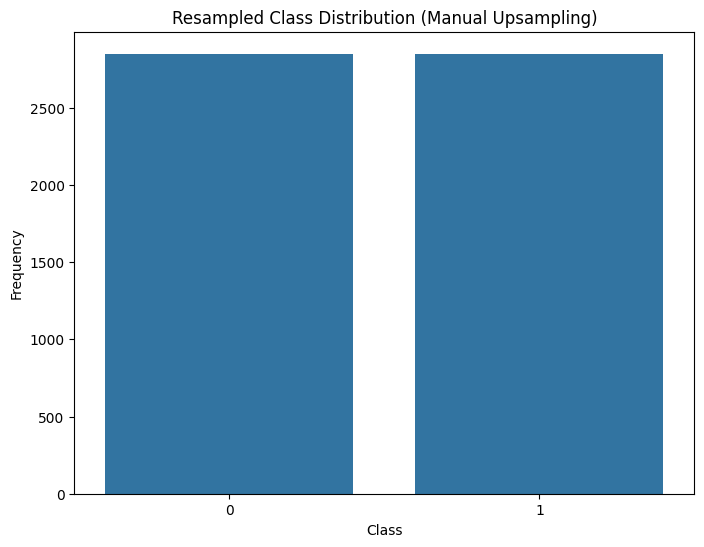

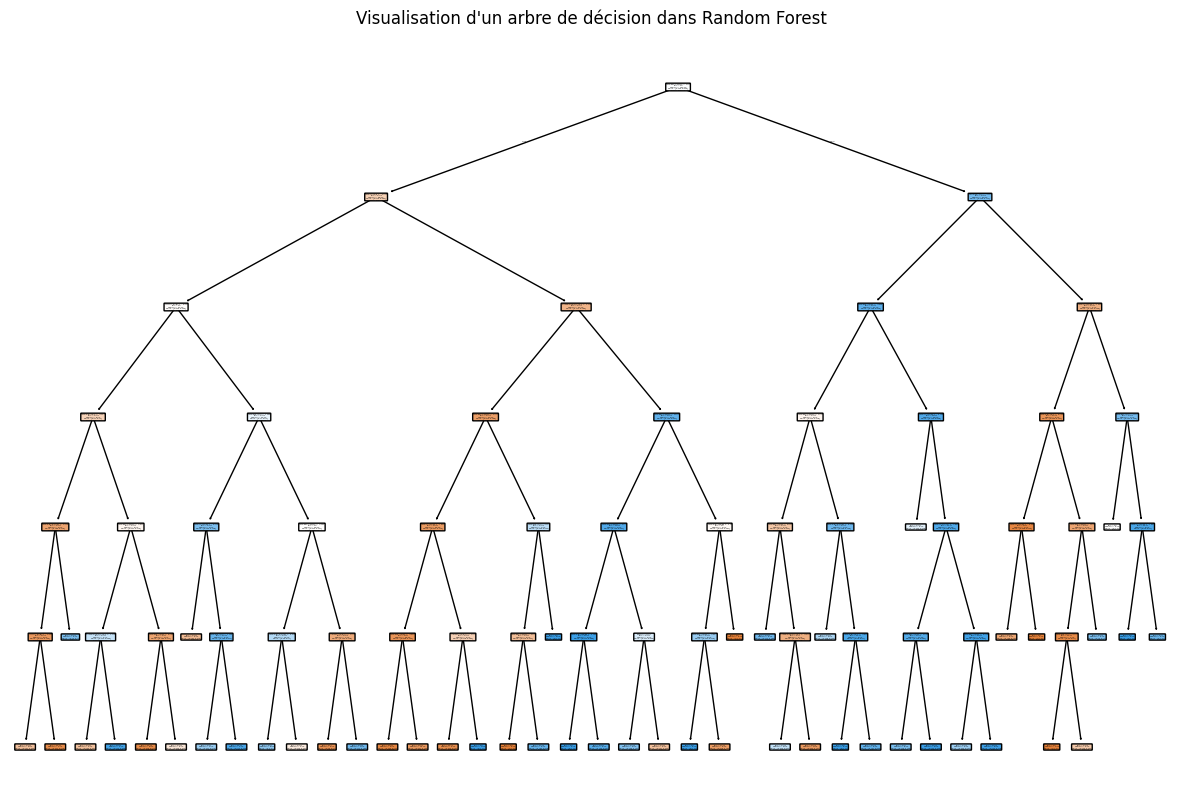

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
# For example:
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable

# Visualize the original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Manual Upsampling
# Identify the minority and majority classes
class_counts = data['Churn'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Upsample the minority class
minority_class_data = data[data['Churn'] == minority_class]
upsampled_minority_class_data = minority_class_data.sample(class_counts[majority_class], replace=True)

# Combine the majority class with the upsampled minority class
majority_class_data = data[data['Churn'] == majority_class]
upsampled_data = pd.concat([majority_class_data, upsampled_minority_class_data])

# Resetting the index to avoid duplicate labels
upsampled_data.reset_index(drop=True, inplace=True)

# Separate features and target
X_resampled = upsampled_data.drop(columns=['Churn'])  # Assuming 'target' is the name of your label column
y_resampled = upsampled_data['Churn']

# Visualize the new class distribution after upsampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (Manual Upsampling)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(
  n_estimators=100,  # Number of trees in the forest
  criterion='gini',  # For measuring the quality of a split
  max_depth=6,  # Maximum depth of the trees
  min_samples_leaf=8,  # Minimum samples required to be at a leaf node
  random_state=100  # For reproducibility
)

# Train the model with the training data
model_rf.fit(X_train, y_train)

# Choose a specific tree from the forest (for visualization)
estimator = model_rf.estimators_[0]  # The first tree in the forest

# Visualize the selected tree
plt.figure(figsize=(15, 10))  # Adjust the size of the plot
plot_tree(
  estimator,
  feature_names=X_train.columns,  # Names of the features
  class_names=["Classe 0", "Classe 1"],  # Adjust according to your class labels
  filled=True,
  rounded=True,
  proportion=True
)
plt.title("Visualisation d'un arbre de décision dans Random Forest")
plt.show()

SVM on the original data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



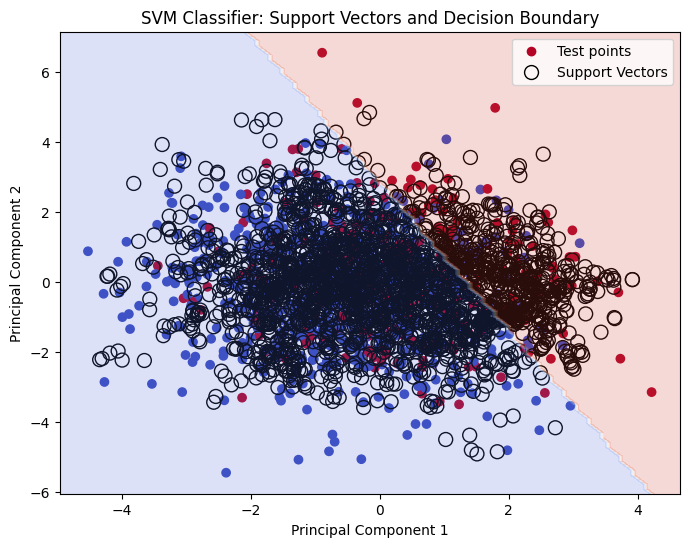

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt
import numpy as np

# Charger les données (assurant que 'combined_data' est déjà chargé)
data = combined_data.copy()

# Prétraiter les données : gérer les variables catégorielles
data = pd.get_dummies(data, drop_first=True)  # Transformer toutes les variables catégorielles en variables numériques

# Gérer les valeurs manquantes (si présentes)
data = data.fillna(data.mean())  # Remplacer les NaN par la moyenne de chaque colonne

# Définir les caractéristiques (X) et la variable cible (y)
X = data.drop("Churn", axis=1)  # Caractéristiques
y = data["Churn"]  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour rééchantillonner la classe minoritaire
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Appliquer ENN (Edited Nearest Neighbors) pour nettoyer la classe majoritaire
enn = EditedNearestNeighbours()
X_train_final, y_train_final = enn.fit_resample(X_train_res, y_train_res)

# Mise à l'échelle des caractéristiques (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez essayer d'autres noyaux comme 'rbf' pour des relations non linéaires
svm_model.fit(X_train_scaled, y_train_final)

# Réduction de la dimensionnalité avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualiser les vecteurs de support
plt.figure(figsize=(8, 6))

# Tracer les points de test
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_model.predict(X_test_scaled), cmap='coolwarm', marker='o', label='Test points')

# Tracer les vecteurs de support
plt.scatter(X_train_pca[svm_model.support_, 0], X_train_pca[svm_model.support_, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')

# Ajouter les lignes de décision
xlim = plt.xlim()
ylim = plt.ylim()

# Créer une grille pour représenter les lignes de décision
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title('SVM Classifier: Support Vectors and Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

svm with smote + enn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



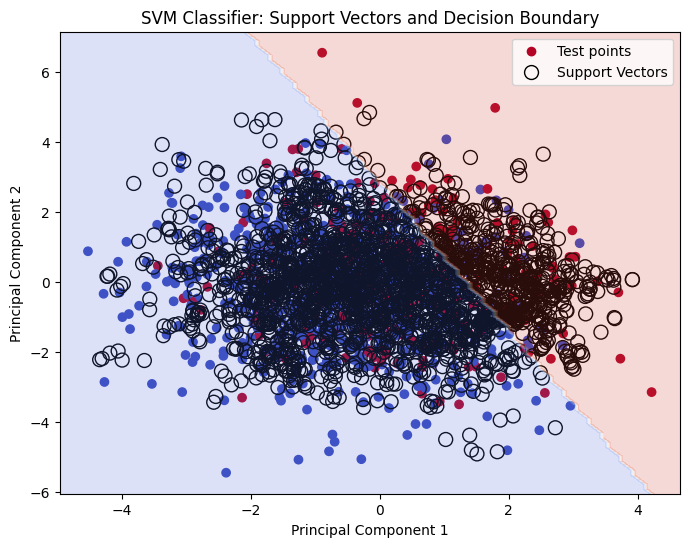

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt
import numpy as np

# Charger les données (assurant que 'combined_data' est déjà chargé)
data = combined_data.copy()

# Prétraiter les données : gérer les variables catégorielles
data = pd.get_dummies(data, drop_first=True)  # Transformer toutes les variables catégorielles en variables numériques

# Gérer les valeurs manquantes (si présentes)
data = data.fillna(data.mean())  # Remplacer les NaN par la moyenne de chaque colonne

# Définir les caractéristiques (X) et la variable cible (y)
X = data.drop("Churn", axis=1)  # Caractéristiques
y = data["Churn"]  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour rééchantillonner la classe minoritaire
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Appliquer ENN (Edited Nearest Neighbors) pour nettoyer la classe majoritaire
enn = EditedNearestNeighbours()
X_train_final, y_train_final = enn.fit_resample(X_train_res, y_train_res)

# Mise à l'échelle des caractéristiques (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez essayer d'autres noyaux comme 'rbf' pour des relations non linéaires
svm_model.fit(X_train_scaled, y_train_final)

# Réduction de la dimensionnalité avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualiser les vecteurs de support
plt.figure(figsize=(8, 6))

# Tracer les points de test
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_model.predict(X_test_scaled), cmap='coolwarm', marker='o', label='Test points')

# Tracer les vecteurs de support
plt.scatter(X_train_pca[svm_model.support_, 0], X_train_pca[svm_model.support_, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')

# Ajouter les lignes de décision
xlim = plt.xlim()
ylim = plt.ylim()

# Créer une grille pour représenter les lignes de décision
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title('SVM Classifier: Support Vectors and Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



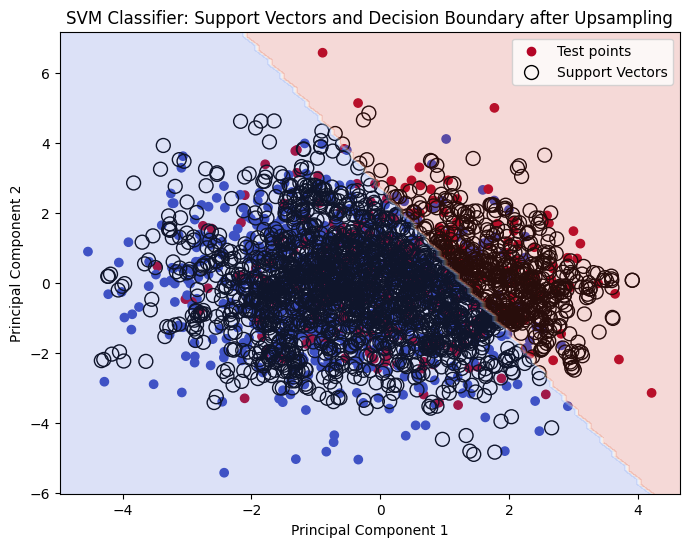

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Charger les données (assurant que 'combined_data' est déjà chargé)
data = combined_data.copy()

# Prétraiter les données : gérer les variables catégorielles
data = pd.get_dummies(data, drop_first=True)  # Transformer toutes les variables catégorielles en variables numériques

# Gérer les valeurs manquantes (si présentes)
data = data.fillna(data.mean())  # Remplacer les NaN par la moyenne de chaque colonne

# Définir les caractéristiques (X) et la variable cible (y)
X = data.drop("Churn", axis=1)  # Caractéristiques
y = data["Churn"]  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour rééchantillonner la classe minoritaire
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Mise à l'échelle des caractéristiques (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez essayer d'autres noyaux comme 'rbf' pour des relations non linéaires
svm_model.fit(X_train_scaled, y_train_res)

# Réduction de la dimensionnalité avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualiser les vecteurs de support
plt.figure(figsize=(8, 6))

# Tracer les points de test
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_model.predict(X_test_scaled), cmap='coolwarm', marker='o', label='Test points')

# Tracer les vecteurs de support
plt.scatter(X_train_pca[svm_model.support_, 0], X_train_pca[svm_model.support_, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')

# Ajouter les lignes de décision
xlim = plt.xlim()
ylim = plt.ylim()

# Créer une grille pour représenter les lignes de décision
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.predict(scaler.transform(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title('SVM Classifier: Support Vectors and Decision Boundary after Upsampling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

DSO 2

SVM : SUPPORT VECTOR MACHINE

Accuracy: 0.767
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       857
           1       0.35      0.76      0.48       143

    accuracy                           0.77      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.86      0.77      0.80      1000

Confusion Matrix:
 [[659 198]
 [ 35 108]]


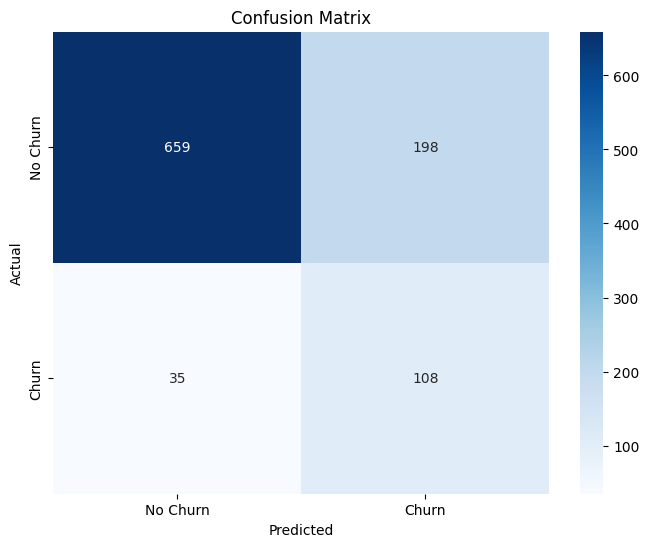

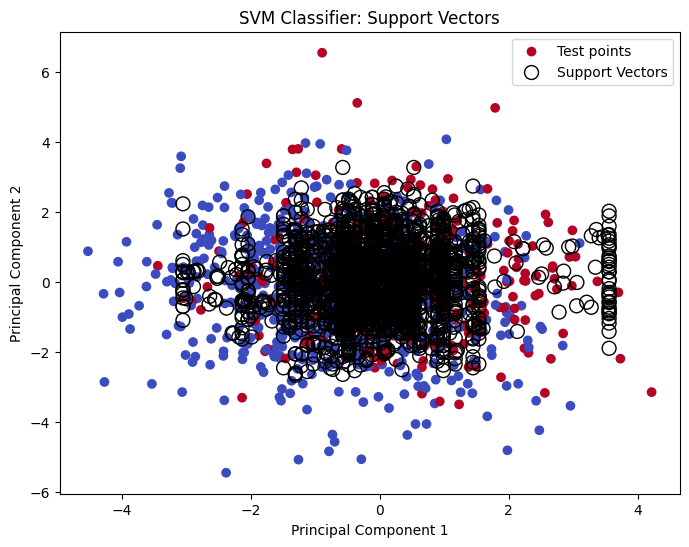

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours  # Correction ici

# Charger les données (votre dataset 'combined_data')
data = combined_data.copy()

# Prétraiter les données : gérer les variables catégorielles
data = pd.get_dummies(data, drop_first=True)  # Transformer toutes les variables catégorielles en variables numériques

# Gérer les valeurs manquantes (si présentes)
data = data.fillna(data.mean())  # Remplacer les NaN par la moyenne de chaque colonne

# Définir les caractéristiques (X) et la variable cible (y)
X = data.drop("Churn", axis=1)  # Caractéristiques
y = data["Churn"]               # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour rééchantillonner la classe minoritaire
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Appliquer ENN (Edited Nearest Neighbors) pour nettoyer la classe majoritaire
enn = EditedNearestNeighbours()
X_train_final, y_train_final = enn.fit_resample(X_train_res, y_train_res)

# Mise à l'échelle des caractéristiques (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')  # Vous pouvez essayer d'autres noyaux comme 'rbf' pour des relations non linéaires
svm_model.fit(X_train_scaled, y_train_final)

# Prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Réduction de la dimensionnalité avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualiser les vecteurs de support
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', marker='o', label='Test points')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')
plt.title('SVM Classifier: Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

SVM up_sampling

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.893
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       857
           1       0.70      0.45      0.54       143

    accuracy                           0.89      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.88      0.89      0.88      1000

Confusion Matrix:
 [[829  28]
 [ 79  64]]


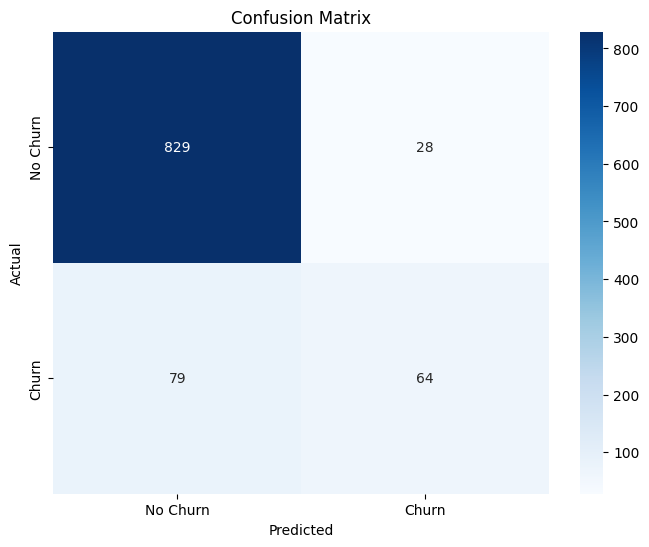

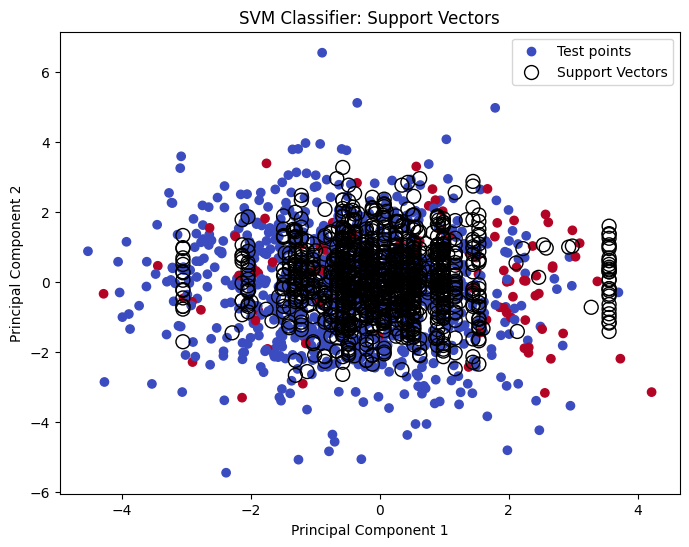

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

# Charger les données (votre dataset 'combined_data')
data = combined_data.copy()

# Prétraiter les données : gérer les variables catégorielles
data = pd.get_dummies(data, drop_first=True)  # Transformer toutes les variables catégorielles en variables numériques

# Gérer les valeurs manquantes (si présentes)
data = data.fillna(data.mean())  # Remplacer les NaN par la moyenne de chaque colonne

# Définir les caractéristiques (X) et la variable cible (y)
X = data.drop("Churn", axis=1)  # Caractéristiques
y = data["Churn"]               # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour rééchantillonner la classe minoritaire
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Appliquer ENN (Edited Nearest Neighbors) pour nettoyer la classe majoritaire
enn = EditedNearestNeighbours()
X_train_final, y_train_final = enn.fit_resample(X_train_res, y_train_res)

# Mise à l'échelle des caractéristiques (SVM est sensible à l'échelle des données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM avec un noyau non linéaire (rbf) et ajustement des poids des classes
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Réglage des hyperparamètres avec GridSearchCV pour trouver les meilleures valeurs de C et gamma
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 1, 10]}
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train_final)

# Meilleur modèle trouvé
best_svm_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_svm_model.predict(X_test_scaled)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Réduction de la dimensionnalité avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualiser les vecteurs de support
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', marker='o', label='Test points')
plt.scatter(best_svm_model.support_vectors_[:, 0], best_svm_model.support_vectors_[:, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')
plt.title('SVM Classifier: Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

logistic regression


Logistic Regression Cross-Validation Accuracy: 0.86

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       857
           1       0.72      0.20      0.31       143

    accuracy                           0.87      1000
   macro avg       0.80      0.59      0.62      1000
weighted avg       0.86      0.87      0.84      1000

ROC-AUC Score on Test Set: 0.82


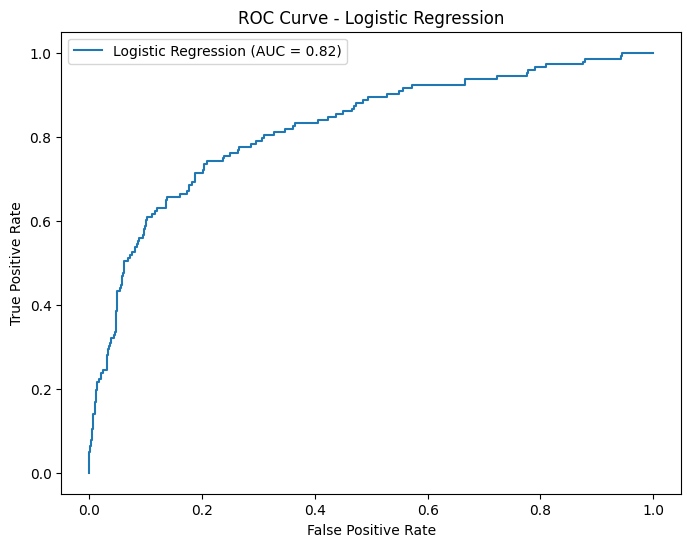

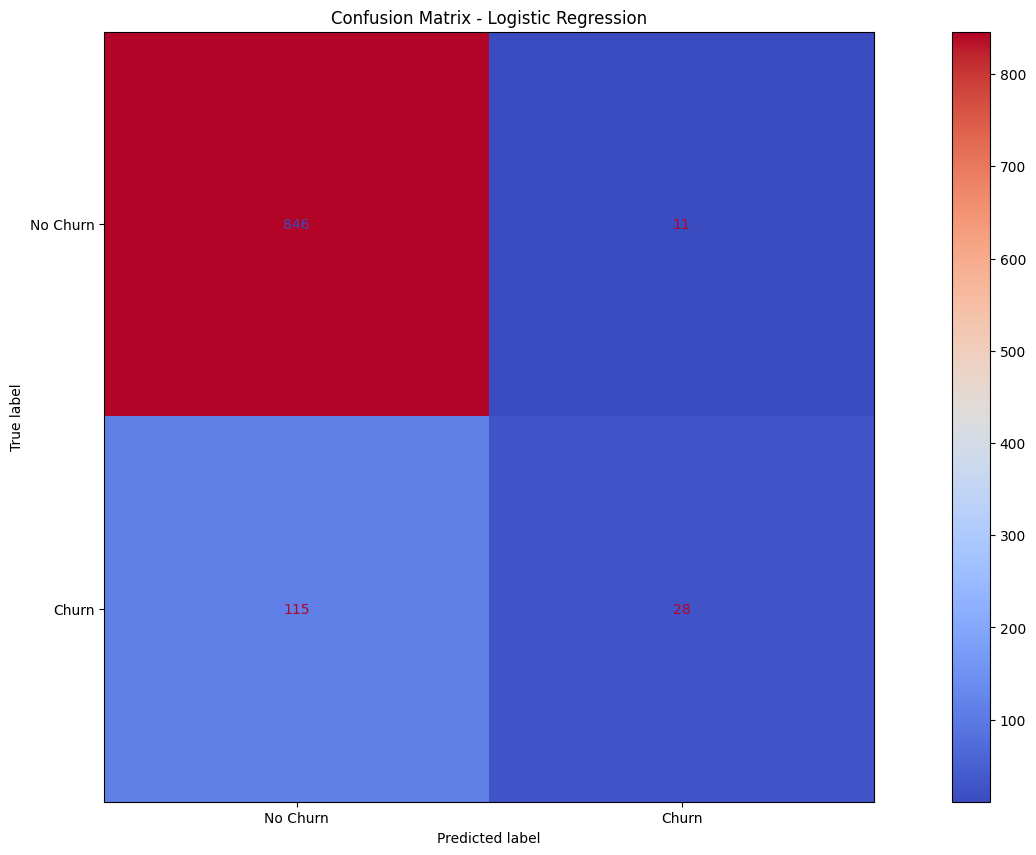

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using cross-validation (5-fold)
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {logreg_scores.mean():.2f}")

# Fit the model to the training set
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC Score on Test Set: {roc_auc_score(y_test, y_pred_prob_logreg):.2f}")

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_logreg):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['No Churn', 'Churn'], cmap='coolwarm')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

logistic regression with upsampling

Logistic Regression Cross-Validation Accuracy (After Resampling): 0.77

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       857
           1       0.36      0.75      0.49       143

    accuracy                           0.78      1000
   macro avg       0.66      0.77      0.67      1000
weighted avg       0.87      0.78      0.80      1000

ROC-AUC Score on Test Set: 0.82


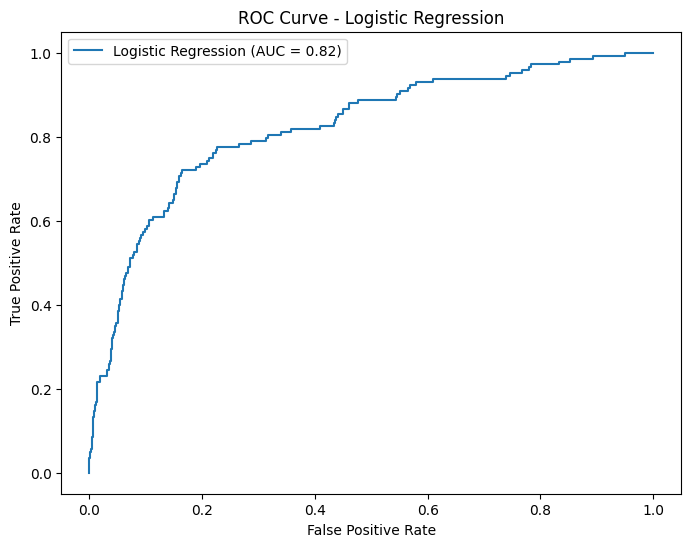

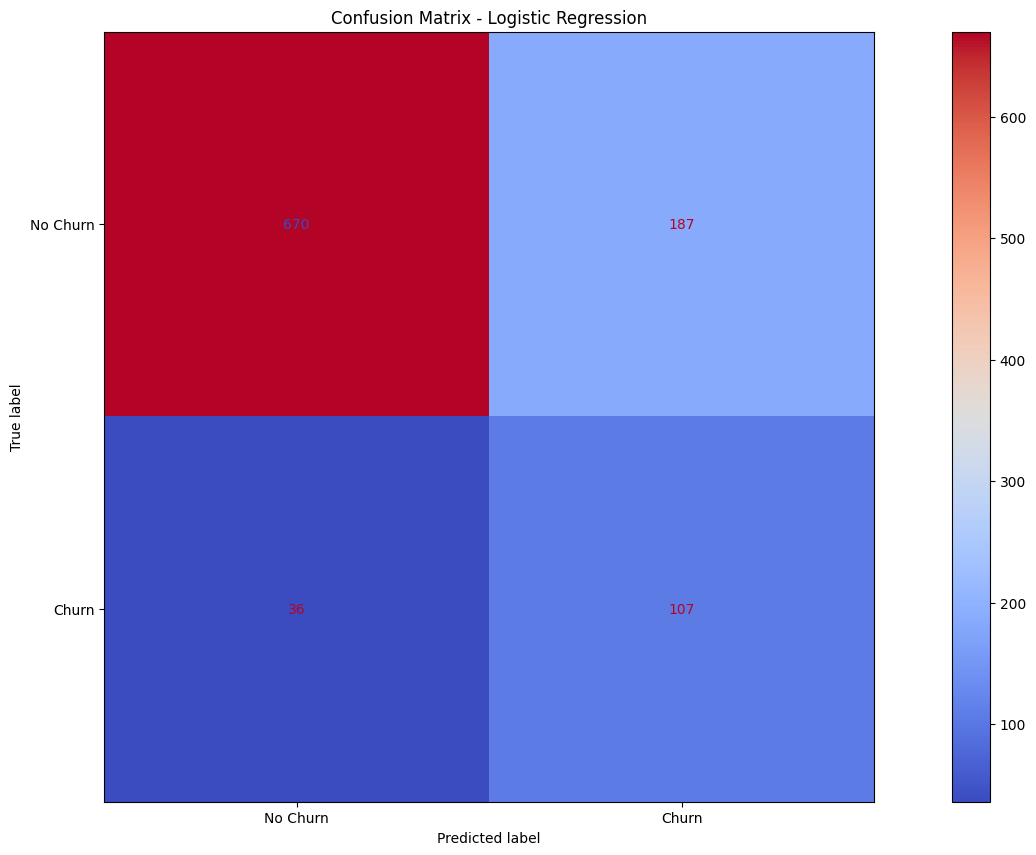

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE + ENN Pipeline
smote = SMOTE(sampling_strategy='minority', random_state=42)
enn = EditedNearestNeighbours()

# Créer un pipeline pour SMOTE + ENN
pipeline = Pipeline(steps=[('smote', smote), ('enn', enn)])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

# Initialisation du modèle de régression logistique
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Validation croisée avec les données rééchantillonnées
logreg_scores = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy (After Resampling): {logreg_scores.mean():.2f}")

# Entraîner le modèle sur les données rééchantillonnées
logreg.fit(X_train_resampled, y_train_resampled)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Évaluer le modèle
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC Score on Test Set: {roc_auc_score(y_test, y_pred_prob_logreg):.2f}")

# ROC Curve pour la régression logistique
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_logreg):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Matrice de confusion pour la régression logistique
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, display_labels=['No Churn', 'Churn'], cmap='coolwarm')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Gradient Boosting Classifier

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
# Make predictions
y_pred = gbm.predict(X_test)  # Predicted class labels (e.g., 0 or 1)
y_proba = gbm.predict_proba(X_test)[:, 1]  # Probability of churn (1)

# Evaluation Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.93      0.71      0.81       143

    accuracy                           0.95      1000
   macro avg       0.94      0.85      0.89      1000
weighted avg       0.95      0.95      0.95      1000

ROC-AUC Score: 0.9121263800376985


Gradient Boosting Classifier with upsampling

In [193]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Resample the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
Churn
0    2276
1    2276
Name: count, dtype: int64


In [194]:
# Initialize the model (e.g., Gradient Boosting Classifier)
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [195]:
# Predictions
y_pred = gbm.predict(X_test)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       574
           1       0.84      0.76      0.80        93

    accuracy                           0.95       667
   macro avg       0.90      0.87      0.88       667
weighted avg       0.94      0.95      0.95       667

ROC-AUC Score: 0.91


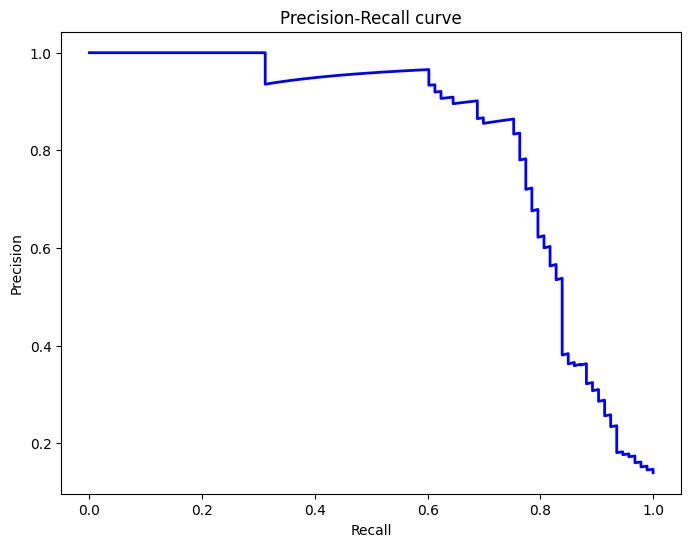

In [196]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

##PART 5 EVALUATION

deecision tree

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have X and y prepared (features and target)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree model
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model (accuracy)
model_score = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {model_score:.2f}")

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Model accuracy: 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.90      0.67      0.77        93

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



decision tree with smote+enn

Model accuracy: 0.91
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       436
           1       0.97      0.85      0.91       531

    accuracy                           0.91       967
   macro avg       0.91      0.91      0.91       967
weighted avg       0.91      0.91      0.91       967



<Figure size 800x600 with 0 Axes>

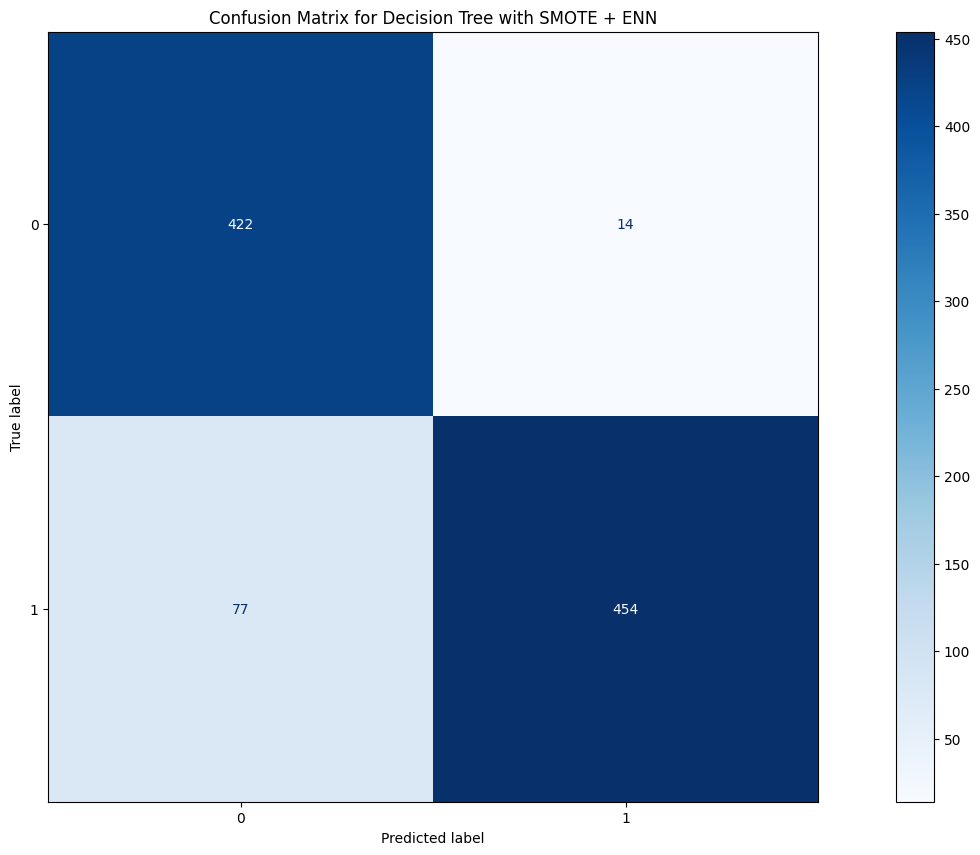

In [198]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your features (X) and target (y) prepared.

# Apply SMOTE + ENN to balance classes
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train a Decision Tree model
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model (accuracy)
model_score = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {model_score:.2f}")

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree with SMOTE + ENN")
plt.show()

decision tree with manually upsampling

Model accuracy: 0.89
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       591
           1       0.94      0.83      0.88       549

    accuracy                           0.89      1140
   macro avg       0.90      0.89      0.89      1140
weighted avg       0.90      0.89      0.89      1140



<Figure size 800x600 with 0 Axes>

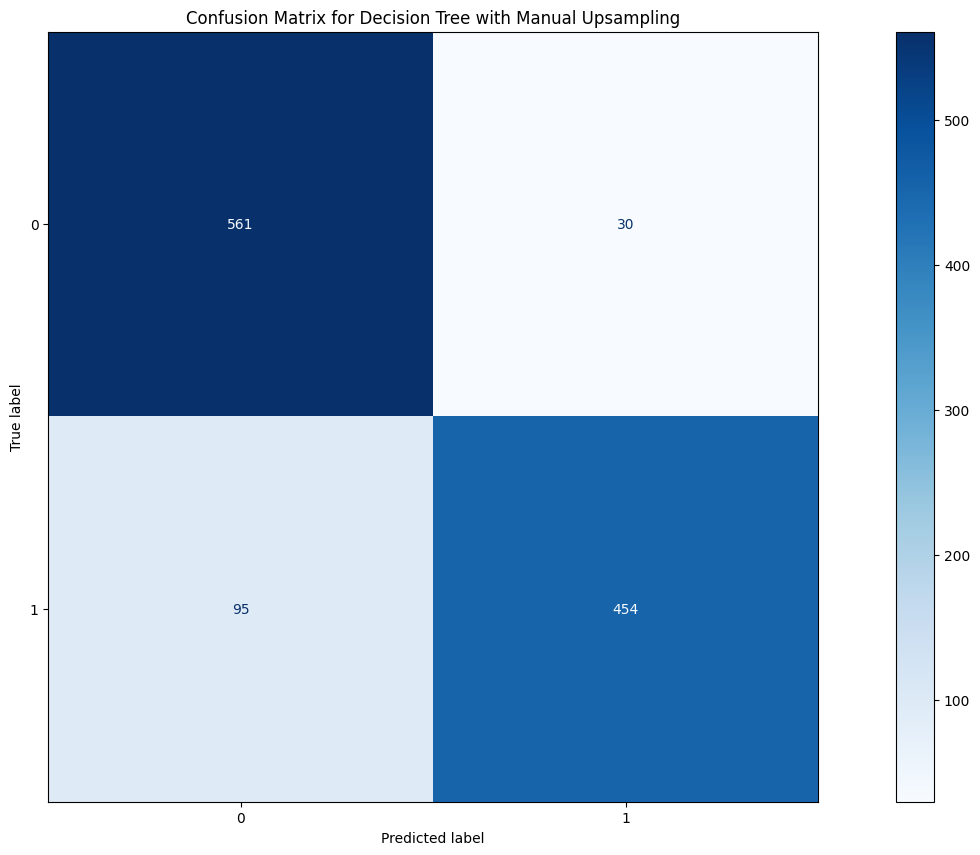

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable



# Manual Upsampling
# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Identify the minority and majority classes
class_counts = data['Churn'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Upsample the minority class
minority_class_data = data[data['Churn'] == minority_class]
upsampled_minority_class_data = minority_class_data.sample(class_counts[majority_class], replace=True)

# Combine majority class with the upsampled minority class
majority_class_data = data[data['Churn'] == majority_class]
upsampled_data = pd.concat([majority_class_data, upsampled_minority_class_data])

# Resetting the index to avoid duplicate labels
upsampled_data.reset_index(drop=True, inplace=True)

# Separate features and target
X_resampled = upsampled_data.drop(columns=['Churn'])  # Assuming 'target' is the name of your label column
y_resampled = upsampled_data['Churn']



# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train a Decision Tree model
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model (accuracy)
model_score = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {model_score:.2f}")

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree with Manual Upsampling")
plt.show()

random forest on original data

In [200]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)
model_rf.score(X_test,y_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       591
           1       0.93      0.84      0.89       549

    accuracy                           0.90      1140
   macro avg       0.90      0.89      0.89      1140
weighted avg       0.90      0.90      0.90      1140



random forest with smote +enn

Model accuracy: 0.92
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       436
           1       0.96      0.89      0.92       531

    accuracy                           0.92       967
   macro avg       0.92      0.92      0.92       967
weighted avg       0.92      0.92      0.92       967



<Figure size 800x600 with 0 Axes>

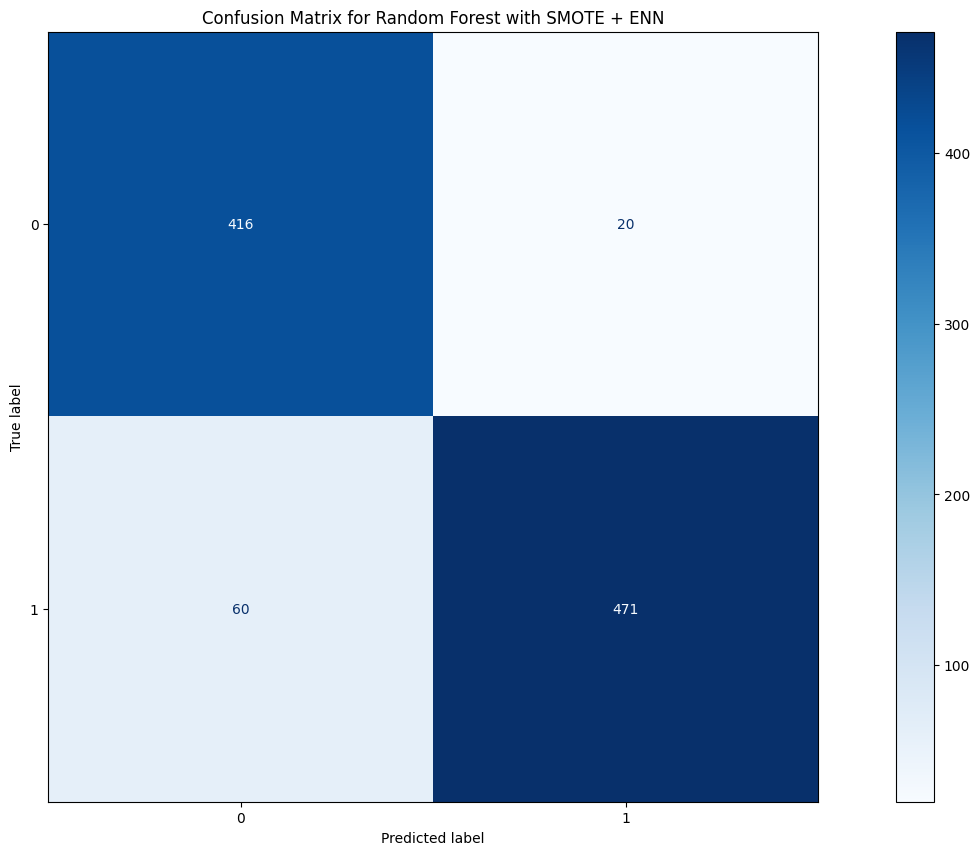

In [201]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming X and y are already defined
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable



# Apply SMOTE + ENN to balance classes
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


# Split the resampled data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
print(f"Model accuracy: {model_rf.score(X_test, y_test):.2f}")
print(classification_report(y_test, y_pred, labels=[0, 1]))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest with SMOTE + ENN")
plt.show()

random forest with upsampling

Model accuracy: 0.91
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       591
           1       0.94      0.87      0.90       549

    accuracy                           0.91      1140
   macro avg       0.91      0.91      0.91      1140
weighted avg       0.91      0.91      0.91      1140



<Figure size 800x600 with 0 Axes>

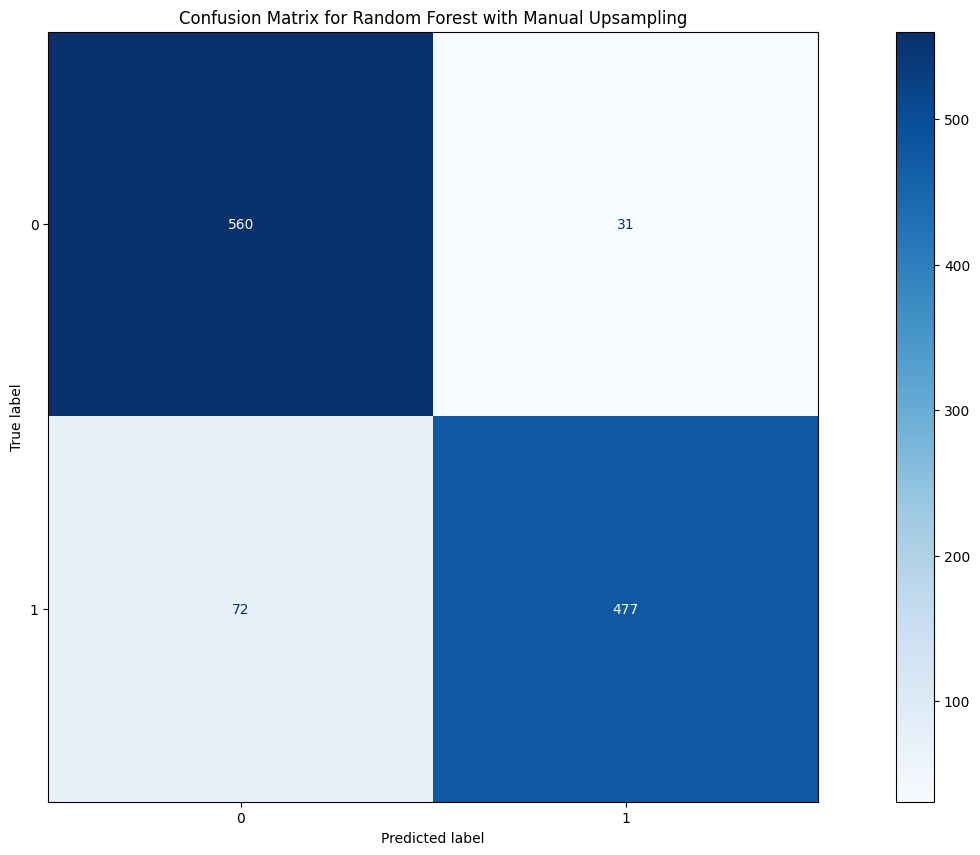

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (make sure you replace this with your actual dataset)
# For example:
# X = combined_data[numerical_columns]  # Your feature set
# y = combined_data['target']  # Your target variable


# Manual Upsampling
# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Identify the minority and majority classes
class_counts = data['Churn'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Upsample the minority class
minority_class_data = data[data['Churn'] == minority_class]
upsampled_minority_class_data = minority_class_data.sample(class_counts[majority_class], replace=True)

# Combine majority class with the upsampled minority class
majority_class_data = data[data['Churn'] == majority_class]
upsampled_data = pd.concat([majority_class_data, upsampled_minority_class_data])

# Resetting the index to avoid duplicate labels
upsampled_data.reset_index(drop=True, inplace=True)

# Separate features and target
X_resampled = upsampled_data.drop(columns=['Churn'])  # Adjust according to your column name
y_resampled = upsampled_data['Churn']



# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model (accuracy)
model_score = model_rf.score(X_test, y_test)
print(f"Model accuracy: {model_score:.2f}")

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest with Manual Upsampling")
plt.show()